In [1]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 73.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import numpy as np
import mne  # Pour lire les fichiers .edf
import pandas as pd

# Dossier contenant les fichiers EDF
dossier_edf = "/content/drive/MyDrive/insomnie"

# Liste des fichiers PSG et Hypnogram
fichiers_psg = sorted([f for f in os.listdir(dossier_edf) if "PSG.edf" in f])
fichiers_hypnogram = sorted([f for f in os.listdir(dossier_edf) if "Hypnogram.edf" in f])
# Mapping des labels de sommeil
label_mapping = {
    "Sleep stage W": 0,  # Wake
    "Sleep stage N1": 1, # N1
    "Sleep stage N2": 2, # N2
    "Sleep stage N3": 3, # N3 (sommeil profond)
    "Sleep stage R": 4   # REM (sommeil paradoxal)
}

# Stocker les données fusionnées
df_all = []

# Itérer sur chaque paire PSG + Hypnogram
for psg_file, hypnogram_file in zip(fichiers_psg, fichiers_hypnogram):
    path_psg = os.path.join(dossier_edf, psg_file)
    path_hypno = os.path.join(dossier_edf, hypnogram_file)

    # Charger les signaux PSG
    raw_psg = mne.io.read_raw_edf(path_psg, preload=True)
    data_psg = raw_psg.get_data().T  # Transposé pour avoir (n_samples, n_channels)
    feature_names = raw_psg.ch_names  # Obtenir les noms des canaux

    # Charger les labels Hypnogram
    annot = mne.read_annotations(path_hypno)
    labels = np.full(data_psg.shape[0], np.nan)  # Initialiser un tableau de labels avec NaN
    hypnogram_features = np.full((data_psg.shape[0], 2), np.nan)  # Colonnes pour onset et durée

    for desc, start, duration in zip(annot.description, annot.onset, annot.duration):
        if desc in label_mapping:
            stage_label = label_mapping[desc]
            start_idx = int(start * raw_psg.info["sfreq"])
            end_idx = int((start + duration) * raw_psg.info["sfreq"])
            labels[start_idx:end_idx] = stage_label
            hypnogram_features[start_idx:end_idx, 0] = start  # Onset time
            hypnogram_features[start_idx:end_idx, 1] = duration  # Duration

    # Créer un DataFrame
    df = pd.DataFrame(data_psg, columns=feature_names)
    df["Label"] = labels  # Ajouter la colonne des labels
    df["Onset_Time"] = hypnogram_features[:, 0]  # Ajouter la colonne Onset
    df["Duration"] = hypnogram_features[:, 1]  # Ajouter la colonne Duration
    df_all.append(df)

# Fusionner tous les DataFrames
df_final = pd.concat(df_all, ignore_index=True)

# Sauvegarder les données fusionnées
df_final.to_csv("sleep_data.csv", index=False)
np.save("sleep_data.npy", df_final.drop(columns=["Label", "Onset_Time", "Duration"]).values)
np.save("sleep_labels.npy", df_final["Label"].values)

print("Fusion terminée ! ✅ Les fichiers ont été enregistrés.")


Extracting EDF parameters from /content/drive/MyDrive/insomnie/ST7011J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-ac2c0422c777>:30: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_psg = mne.io.read_raw_edf(path_psg, preload=True)
<ipython-input-3-ac2c0422c777>:30: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_psg = mne.io.read_raw_edf(path_psg, preload=True)


Reading 0 ... 3589999  =      0.000 ... 35899.990 secs...
Extracting EDF parameters from /content/drive/MyDrive/insomnie/ST7012J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3131999  =      0.000 ... 31319.990 secs...


<ipython-input-3-ac2c0422c777>:30: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_psg = mne.io.read_raw_edf(path_psg, preload=True)
<ipython-input-3-ac2c0422c777>:30: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_psg = mne.io.read_raw_edf(path_psg, preload=True)


Fusion terminée ! ✅ Les fichiers ont été enregistrés.


In [4]:
import pandas as pd
import numpy as np
dftotal=pd.read_csv("/kaggle/input/sleep-data/sleep_data.csv")
dftotal

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0
...,...,...,...,...,...,...,...,...
6721995,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.050079,NaN,NaN,NaN
6721996,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.047676,NaN,NaN,NaN
6721997,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.040597,NaN,NaN,NaN
6721998,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.029526,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


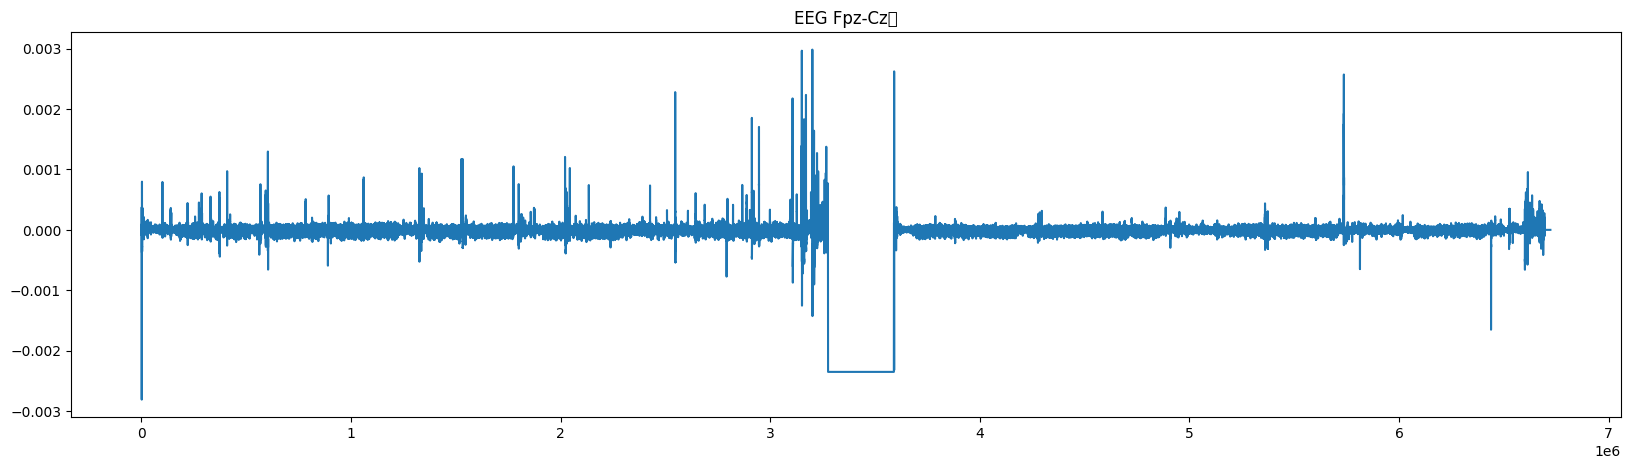

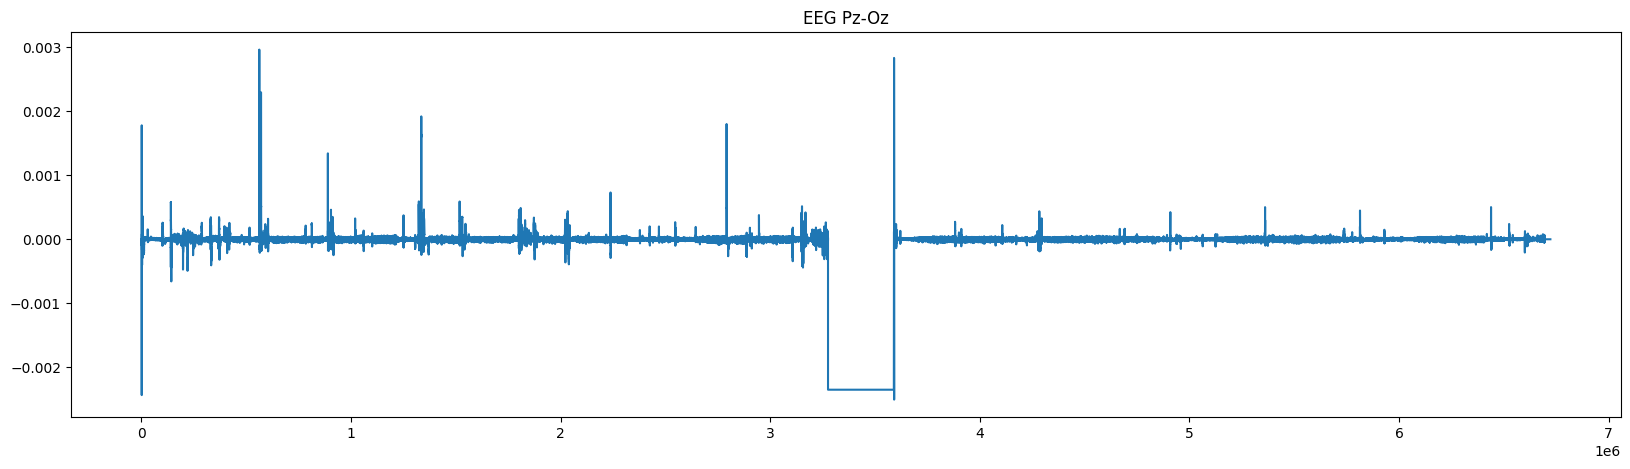

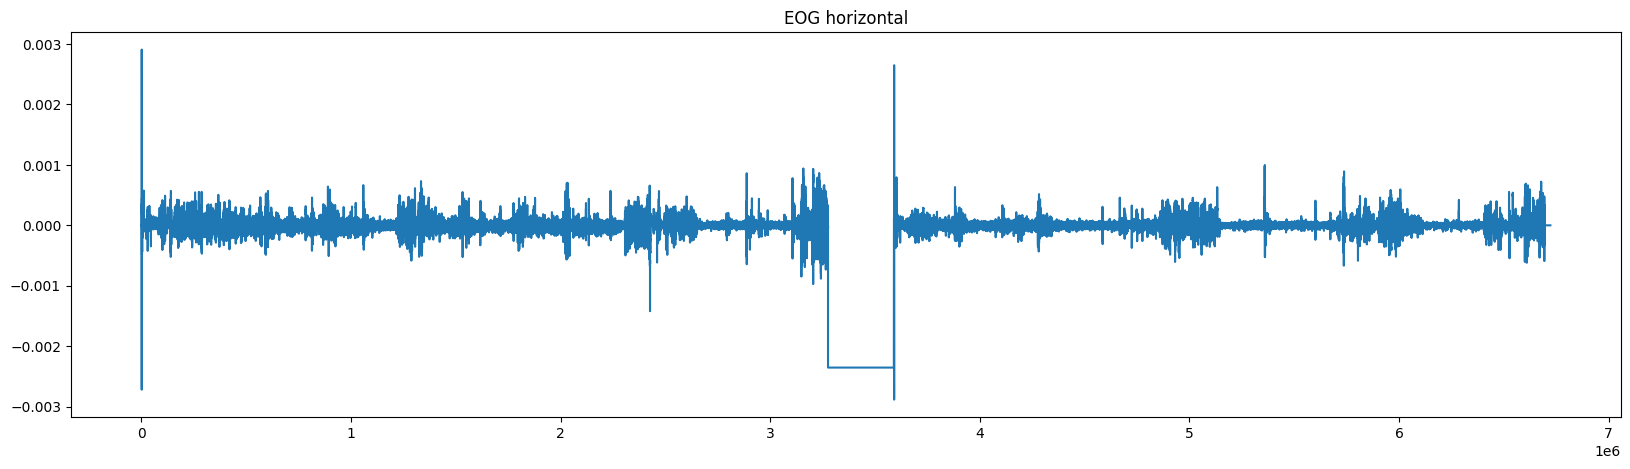

In [5]:
import matplotlib.pyplot as plt
dftotal['EEG Fpz-Cz'].plot(title="EEG Fpz-Cz	",figsize=(20,5))
plt.show()
import matplotlib.pyplot as plt
dftotal['EEG Pz-Oz'].plot(title="EEG Pz-Oz",figsize=(20,5))
plt.show()
import matplotlib.pyplot as plt
dftotal['EOG horizontal'].plot(title="EOG horizontal",figsize=(20,5))
plt.show()

In [6]:
dftotal.isna().sum()

EEG Fpz-Cz              0
EEG Pz-Oz               0
EOG horizontal          0
EMG submental           0
Marker                  0
Label             4895000
Onset_Time        4895000
Duration          4895000
dtype: int64

In [7]:
dftotal.dropna(inplace=True)

In [8]:
dftotal

,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0
...,...,...,...,...,...,...,...,...
6709995,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000929,0.0,30090.0,1110.0
6709996,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000884,0.0,30090.0,1110.0
6709997,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000753,0.0,30090.0,1110.0
6709998,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000547,0.0,30090.0,1110.0


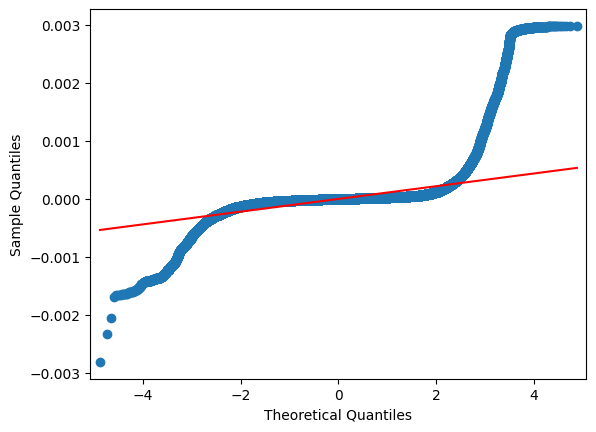

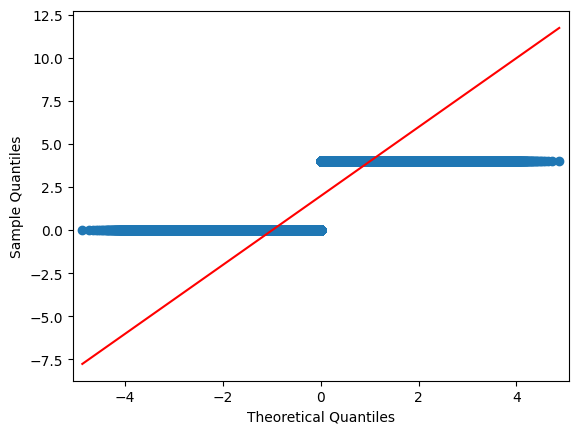

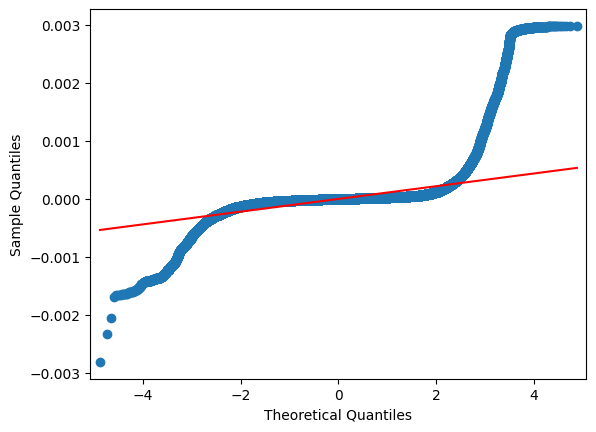

In [9]:
dftotal.Label.value_counts()
import statsmodels.api as sm
sm.qqplot(dftotal.Label, line='s')
sm.qqplot(dftotal["EEG Fpz-Cz"], line='s')

In [10]:
dftotal['apne']=0

In [11]:
import pandas as pd



df =dftotal.copy()

# Seuils pour considérer une apnée
EMG_LOW_THRESHOLD = 2e-07
STAGES_TO_CONSIDER = [3,4]
MIN_DURATION = 10

# Détection des événements d'apnée
def detect_apnea_from_emg(df):
    apnea_events = []

    for index, row in df.iterrows():
        if row['EMG submental'] < EMG_LOW_THRESHOLD and row['Duration'] >= MIN_DURATION:
            apnea_detected = row['Label'] in STAGES_TO_CONSIDER
        else:
            apnea_detected = False

        apnea_events.append({
            'index': index,
            'stage': row['Label'],
            'onset': row['Onset_Time'],
            'duration': row['Duration'],
            'emg_level': row['EMG submental'],
            'apnea_detected': apnea_detected
        })

    return pd.DataFrame(apnea_events)

# Appliquer la détection
apnea_results = detect_apnea_from_emg(df)

# Afficher les résultats



In [12]:
apnea_results["apnea_detected"].unique()

array([False,  True])

In [13]:
dftotal["apne"]=apnea_results["apnea_detected"]
dftotal["apne"].value_counts()

apne
False    413742
True      87258
Name: count, dtype: int64

In [14]:
dftotal.dropna(inplace=True)
dftotal

,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration,apne
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0,False
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0,False
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0,False
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0,False
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0,False
...,...,...,...,...,...,...,...,...,...
1826995,9.705182e-06,1.519868e-05,2.325581e-05,-1.831166e-07,1.999960,0.0,17850.0,540.0,False
1826996,6.042849e-06,1.483245e-05,3.021425e-05,9.155832e-07,1.999962,0.0,17850.0,540.0,False
1826997,-2.746750e-06,1.702985e-05,3.680645e-05,1.281817e-06,1.999967,0.0,17850.0,540.0,False
1826998,-3.112983e-06,1.300128e-05,4.669474e-05,4.577916e-06,1.999976,0.0,17850.0,540.0,False


In [15]:
dftotal["apne"].value_counts()

apne
False    413742
True      87258
Name: count, dtype: int64

In [16]:
dftotal
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dftotal["apne"] = encoder.fit_transform(dftotal[["apne"]])
dftotal["apne"].value_counts()
dftotal["apne"]=dftotal["apne"].astype(int)
dftotal["apne"].value_counts()


apne
0    413742
1     87258
Name: count, dtype: int64

In [17]:
dftotal[80000:1000000]["apne"].value_counts()

apne
0    333742
1     87258
Name: count, dtype: int64

# ***Prediction de EEG-Cz au cours du temps***

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = dftotal['EEG Fpz-Cz'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [20]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # prédire le 31e point à partir des 30 précédents
X, y = create_sequences(data_scaled, seq_length)


In [21]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                             torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [22]:
import torch.nn as nn

class EEGForecastLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # prendre le dernier état
        out = self.fc(out)
        return out


In [23]:
# ===== 3. Définir le modèle LSTM =====
class EEGPredictor(nn.Module):
    def __init__(self):
        super(EEGPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        # x: (batch, seq_len, 1)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Prendre la dernière sortie temporelle
        return out

model = EEGPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ===== 4. Entraînement =====
for epoch in range(10):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        if X_batch.ndim == 2:  # Assure 3D pour LSTM
            X_batch = X_batch.unsqueeze(-1)
        y_batch = y_batch.unsqueeze(-1)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8, 1, 1])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 - Loss: 0.0012
Epoch 2 - Loss: 0.0002
Epoch 3 - Loss: 0.0002
Epoch 4 - Loss: 0.0002
Epoch 5 - Loss: 0.0002
Epoch 6 - Loss: 0.0002
Epoch 7 - Loss: 0.0002
Epoch 8 - Loss: 0.0002
Epoch 9 - Loss: 0.0002
Epoch 10 - Loss: 0.0002


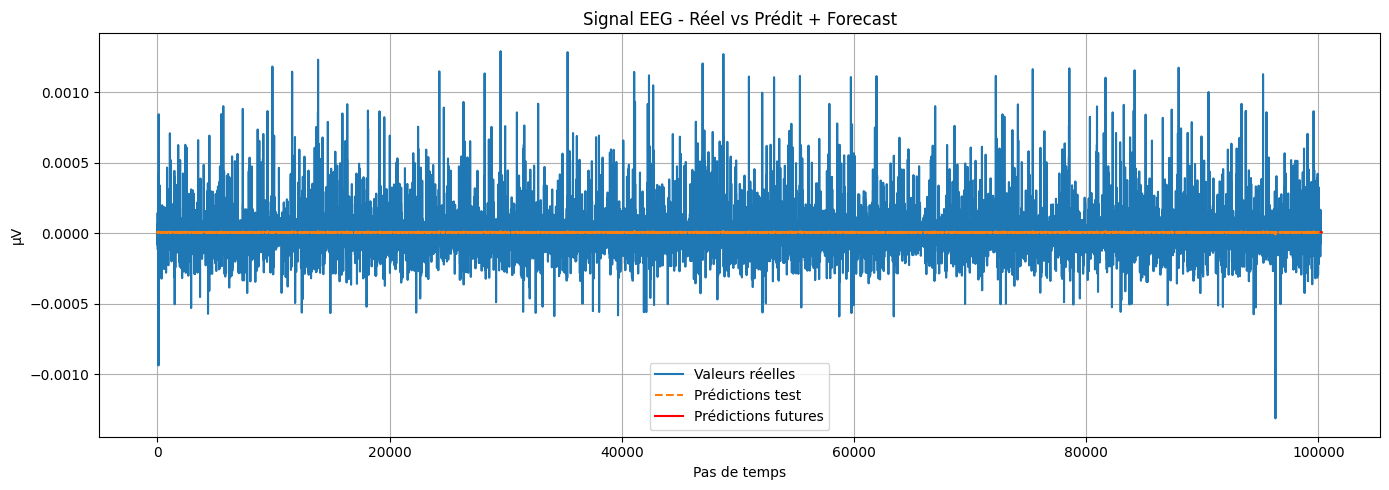

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# ----------- Prédictions sur le test set -----------
model.eval()
predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        if X_batch.ndim == 2:
            X_batch = X_batch.unsqueeze(-1)
        output = model(X_batch)
        predictions.append(output.numpy())

predictions = np.concatenate(predictions, axis=0)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
y_true = y_test_tensor[:len(predictions)].numpy()

# ----------- Remettre à l'échelle d'origine -----------
predictions_inv = scaler.inverse_transform(predictions)
y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))

# ----------- Prédictions futures (forecasting) -----------
last_seq = torch.tensor(X_test[-1], dtype=torch.float32).unsqueeze(0)  # Shape: [1, sequence_length, 1]
future_steps = 100
future_preds = []

with torch.no_grad():
    for _ in range(future_steps):
        pred = model(last_seq)
        future_preds.append(pred.item())

        # Correction ici: assurer que pred a la bonne dimension
        # Reshape pred pour correspondre à l'entrée attendue
        pred_reshaped = pred.reshape(1, 1, 1)  # Force la forme à [1, 1, 1]

        # Concaténer avec les pas de temps précédents
        new_input = torch.cat((last_seq[:, 1:, :], pred_reshaped), dim=1)
        last_seq = new_input

future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# ----------- Visualisation combinée -----------
plt.figure(figsize=(14, 5))
plt.plot(y_true_inv, label="Valeurs réelles", linewidth=1.5)
plt.plot(predictions_inv, label="Prédictions test", linestyle="--")
plt.plot(range(len(y_true_inv), len(y_true_inv) + len(future_preds_inv)), future_preds_inv, label="Prédictions futures", color="red")
plt.title("Signal EEG - Réel vs Prédit + Forecast")
plt.xlabel("Pas de temps")
plt.ylabel("µV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Augmenter la complexité de votre réseau LSTM
class ImprovedEEGModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, dropout=0.2):
        super(ImprovedEEGModel, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=4)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)

        # Appliquer l'attention sur la sortie LSTM
        attn_output, _ = self.attention(lstm_out, lstm_out, lstm_out)

        # Prendre la dernière sortie
        out = attn_output[:, -1, :]

        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)

        return out

In [26]:
# Utiliser RobustScaler au lieu de StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Ou utiliser MinMaxScaler pour préserver l'amplitude relative
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [28]:
# Pour les prédictions futures, utilisez une approche récursive avec correction
def recursive_forecast(model, last_sequence, steps=100, correction_factor=0.9):
    model.eval()
    input_seq = last_sequence.clone()
    predictions = []

    with torch.no_grad():
        for _ in range(steps):
            # Faire une prédiction
            output = model(input_seq)

            # Appliquer une légère correction aléatoire pour éviter l'aplatissement
            noise = torch.randn_like(output) * 0.05
            output = output + noise

            # Stocker la prédiction
            predictions.append(output.item())

            # Préparer la séquence pour la prochaine prédiction
            new_point = output.reshape(1, 1, 1)
            input_seq = torch.cat((input_seq[:, 1:, :], new_point), dim=1)

    return np.array(predictions)

In [29]:
# Utiliser une fenêtre temporelle plus large
sequence_length = 128  # Au lieu de 50 ou 100 par exemple

In [30]:
# Créer une fonction de perte qui pénalise l'aplatissement
class FrequencyAwareLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(FrequencyAwareLoss, self).__init__()
        self.mse = nn.MSELoss()
        self.alpha = alpha

    def forward(self, pred, target):
        # MSE standard
        mse_loss = self.mse(pred, target)

        # Perte dans le domaine fréquentiel
        pred_fft = torch.fft.rfft(pred.squeeze())
        target_fft = torch.fft.rfft(target.squeeze())

        freq_loss = self.mse(torch.abs(pred_fft), torch.abs(target_fft))

        # Combinaison des deux pertes
        total_loss = mse_loss + self.alpha * freq_loss

        return total_loss

Epoch 1 | Train Loss: 0.0332 | Val Loss: 0.0137
Epoch 2 | Train Loss: 0.0206 | Val Loss: 0.0149
Epoch 3 | Train Loss: 0.0197 | Val Loss: 0.0137
Epoch 4 | Train Loss: 0.0188 | Val Loss: 0.0151
Epoch 5 | Train Loss: 0.0178 | Val Loss: 0.0136
Epoch 6 | Train Loss: 0.0171 | Val Loss: 0.0134
Epoch 7 | Train Loss: 0.0161 | Val Loss: 0.0138
Epoch 8 | Train Loss: 0.0157 | Val Loss: 0.0143
Epoch 9 | Train Loss: 0.0151 | Val Loss: 0.0140
Epoch 10 | Train Loss: 0.0145 | Val Loss: 0.0153
Epoch 11 | Train Loss: 0.0141 | Val Loss: 0.0142
Epoch 12 | Train Loss: 0.0137 | Val Loss: 0.0151
Epoch 13 | Train Loss: 0.0130 | Val Loss: 0.0150
Epoch 14 | Train Loss: 0.0128 | Val Loss: 0.0149
Epoch 15 | Train Loss: 0.0126 | Val Loss: 0.0147
Epoch 16 | Train Loss: 0.0125 | Val Loss: 0.0150
Early stopping.


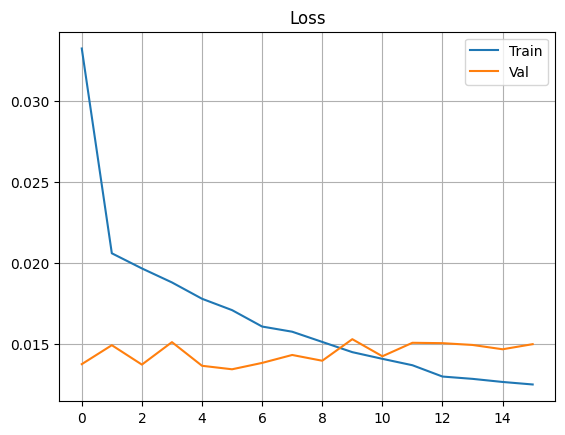

In [31]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ------------------ Dataset simplifié ------------------
class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ------------------ Modèle LSTM simple ------------------
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# ------------------ Fonctions utilitaires ------------------
def prepare_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# ------------------ Chargement des données ------------------
# Exemple : data = df["EEG Fpz-Cz"].values
data = dftotal['EEG Fpz-Cz'].values  # ton DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

X, y = prepare_sequences(data_scaled, 64)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_loader = DataLoader(EEGDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(EEGDataset(X_val, y_val), batch_size=64)

# ------------------ Entraînement ------------------
model = SimpleLSTM()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

best_loss, patience_counter = float('inf'), 0
train_losses, val_losses = [], []

for epoch in range(50):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = sum(loss_fn(model(Xv), yv).item() for Xv, yv in val_loader) / len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        patience_counter += 1
        if patience_counter >= 10:
            print("Early stopping.")
            break

# ------------------ Affichage ------------------
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Val")
plt.legend(); plt.title("Loss"); plt.grid(); plt.show()


In [32]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()


/tmp/ipykernel_31/1817869122.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


SimpleLSTM(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [33]:
y_preds = []
with torch.no_grad():
    for Xv, _ in val_loader:
        pred = model(Xv)
        y_preds.extend(pred.squeeze().tolist())

y_preds = np.array(y_preds)


In [34]:
forecast_steps = 50
input_seq = torch.tensor(data_scaled[-64:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1)  # [1, 64, 1]

forecast = []
model.eval()
with torch.no_grad():
    for _ in range(forecast_steps):
        next_val = model(input_seq)  # [1, 1]
        forecast.append(next_val.item())
        # On reshape bien next_val en [1, 1, 1] pour concaténer avec input_seq
        next_val_reshaped = next_val.unsqueeze(-1)  # [1, 1, 1]
        input_seq = torch.cat([input_seq[:, 1:, :], next_val_reshaped], dim=1)  # [1, 64, 1]


NameError: name 'forecast_inv' is not defined

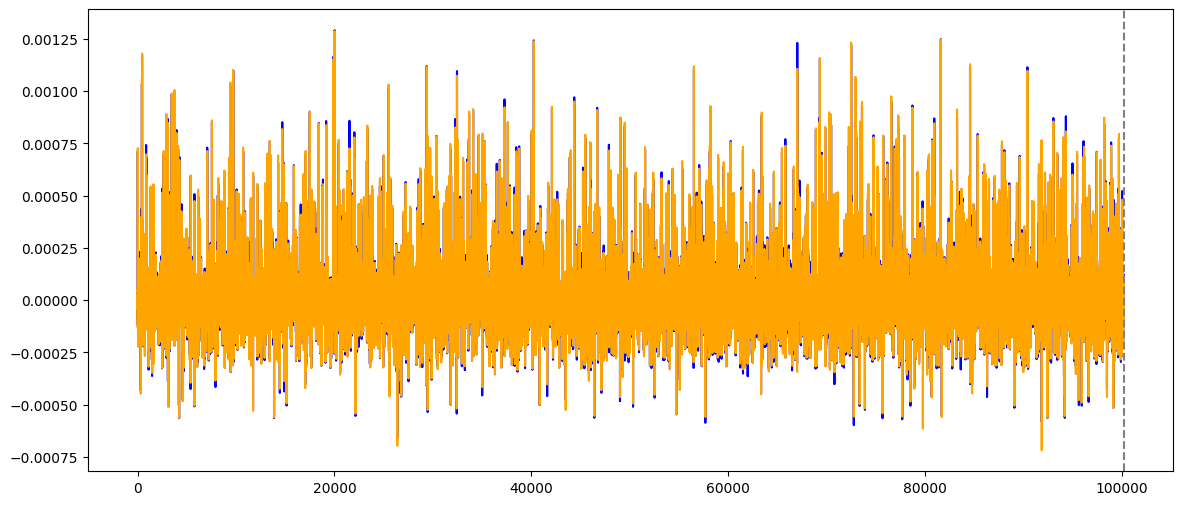

In [35]:
# Reconvertir y_val et y_preds
y_val_inv = scaler.inverse_transform(np.array(y_val[:len(y_preds)]).reshape(-1, 1)).flatten()
y_preds_inv = scaler.inverse_transform(y_preds.reshape(-1, 1)).flatten()

plt.figure(figsize=(14, 6))
plt.plot(y_val_inv, label="Valeurs réelles", color='blue')
plt.plot(y_preds_inv, label="Prédictions", color='orange')
plt.axvline(len(y_val_inv), color='gray', linestyle='--')  # séparation prédiction/forecast
plt.plot(np.arange(len(y_val_inv), len(y_val_inv)+forecast_steps), forecast_inv, label="Forecast", color='green')
plt.legend()
plt.title("Réel vs Prédiction vs Forecast")
plt.grid()
plt.show()


/tmp/ipykernel_31/2067577912.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


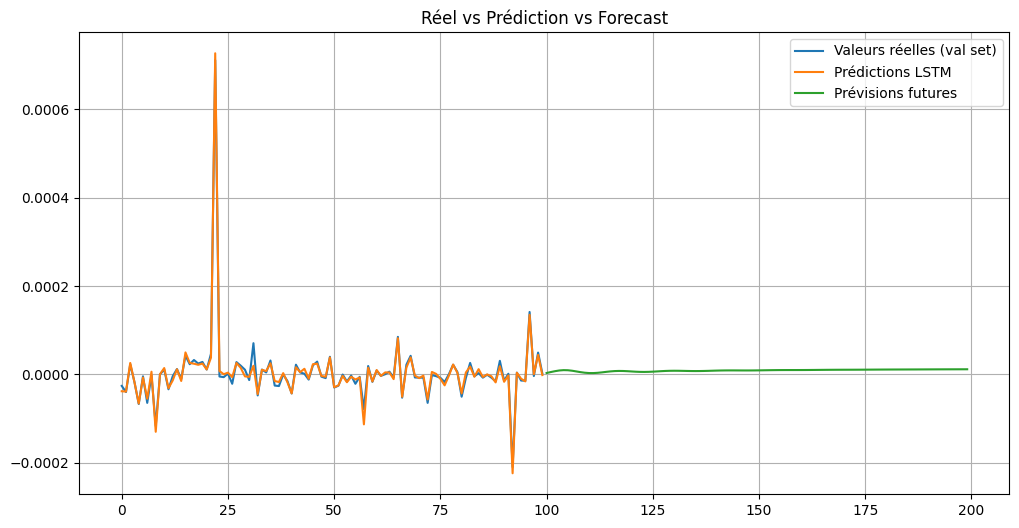

In [36]:
# ------------------ Prédictions et Forecast ------------------
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# Prédictions sur les données de validation
with torch.no_grad():
    y_pred = model(torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)).numpy().flatten()

# Inverser la standardisation
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Forecast (prédictions futures)
last_seq = torch.tensor(data_scaled[-64:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
forecast = []

with torch.no_grad():
    for _ in range(100):  # nombre de points à prédire
        pred = model(last_seq)
        forecast.append(pred.item())
        # Mettre à jour la séquence d'entrée
        last_seq = torch.cat((last_seq[:, 1:, :], pred.unsqueeze(1)), dim=1)

forecast = np.array(forecast)
forecast_inv = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
# Sauvegarder les prévisions futures dans un CSV
forecast_df = pd.DataFrame(forecast_inv, columns=["Forecast"])
forecast_df.to_csv("forecast_predictionsEEG.csv", index=False)

# ------------------ Affichage ------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true_inv[:100], label='Valeurs réelles (val set)')
plt.plot(y_pred_inv[:100], label='Prédictions LSTM')
plt.plot(np.arange(len(y_true_inv[:100]), len(y_true_inv[:100]) + len(forecast_inv)), forecast_inv, label='Prévisions futures')
plt.title("Réel vs Prédiction vs Forecast")
plt.legend()
plt.grid()
plt.show()


In [37]:
import pandas as pd
df1=pd.read_csv("forecast_predictionsEEG.csv")
df1

,Forecast
0,0.000003
1,0.000005
2,0.000007
3,0.000009
4,0.000009
...,...
95,0.000011
96,0.000011
97,0.000011
98,0.000011


# ***Prediction de EMG***

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ------------------ Dataset simplifié ------------------
class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ------------------ Modèle LSTM simple ------------------
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# ------------------ Fonctions utilitaires ------------------
def prepare_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# ------------------ Chargement des données ------------------
# Exemple : data = df["EEG Fpz-Cz"].values
data = dftotal['EMG submental'].values  # ton DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

X, y = prepare_sequences(data_scaled, 64)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_loader = DataLoader(EEGDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(EEGDataset(X_val, y_val), batch_size=64)

# ------------------ Entraînement ------------------
model = SimpleLSTM()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

best_loss, patience_counter = float('inf'), 0
train_losses, val_losses = [], []

for epoch in range(50):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = sum(loss_fn(model(Xv), yv).item() for Xv, yv in val_loader) / len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model2.pth")
    else:
        patience_counter += 1
        if patience_counter >= 10:
            print("Early stopping.")
            break

# ------------------ Affichage ------------------
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Val")
plt.legend(); plt.title("Loss"); plt.grid(); plt.show()


/tmp/ipykernel_31/1298188281.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model2.pth"))


Les prévisions ont été sauvegardées dans 'forecast_predictions.csv'


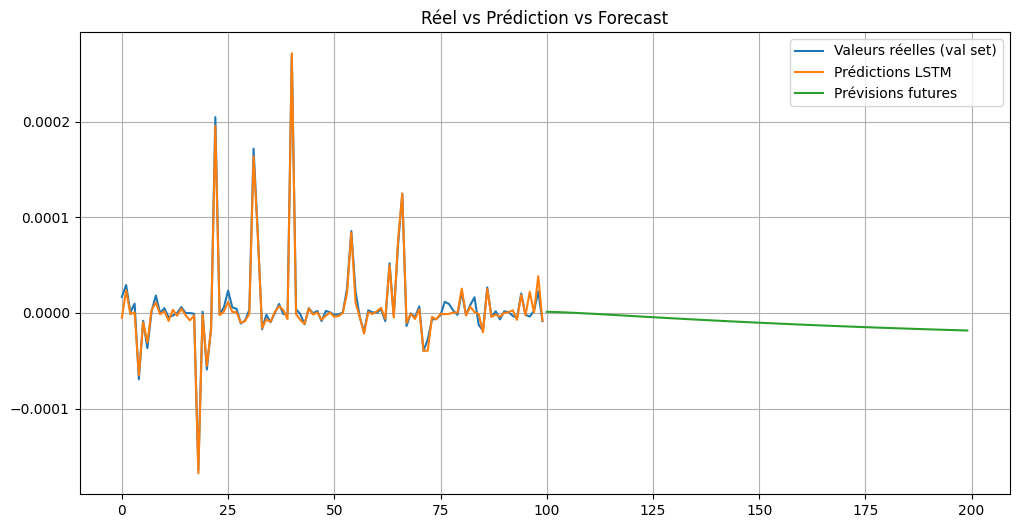

In [39]:
# ------------------ Prédictions et Forecast ------------------
model.load_state_dict(torch.load("best_model2.pth"))
model.eval()

# Prédictions sur les données de validation
with torch.no_grad():
    y_pred = model(torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)).numpy().flatten()

# Inverser la standardisation
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Forecast (prédictions futures)
last_seq = torch.tensor(data_scaled[-64:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
forecast = []

with torch.no_grad():
    for _ in range(100):  # nombre de points à prédire
        pred = model(last_seq)
        forecast.append(pred.item())
        # Mettre à jour la séquence d'entrée
        last_seq = torch.cat((last_seq[:, 1:, :], pred.unsqueeze(1)), dim=1)

forecast = np.array(forecast)
forecast_inv = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
import pandas as pd

# Sauvegarder les prévisions futures dans un CSV
forecast_df = pd.DataFrame(forecast_inv, columns=["Forecast"])
forecast_df.to_csv("forecast_predictionsEMG.csv", index=False)

print("Les prévisions ont été sauvegardées dans 'forecast_predictions.csv'")


# ------------------ Affichage ------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true_inv[:100], label='Valeurs réelles (val set)')
plt.plot(y_pred_inv[:100], label='Prédictions LSTM')
plt.plot(np.arange(len(y_true_inv[:100]), len(y_true_inv[:100]) + len(forecast_inv)), forecast_inv, label='Prévisions futures')
plt.title("Réel vs Prédiction vs Forecast")
plt.legend()
plt.grid()
plt.show()


In [40]:
print(y_true_inv[:100])
print(y_pred_inv[:100])
print(forecast_inv)

[ 1.66636147e-05  2.91155466e-05  5.49349936e-07  9.70518220e-06
 -6.94012086e-05 -8.24024904e-06 -3.68064457e-05  2.01428310e-06
  1.81285479e-05 -1.83116645e-07  4.94414942e-06 -4.57791613e-06
 -2.74674968e-06 -1.83116645e-07  6.04284930e-06 -1.83116645e-07
 -1.83116645e-07 -9.15583227e-07 -1.64621864e-04  1.28181652e-06
 -5.91466764e-05 -1.55649149e-05  2.04541293e-04 -1.28181652e-06
  5.67661600e-06  2.32558140e-05  5.67661600e-06  4.21168284e-06
 -1.11701154e-05 -7.87401575e-06  3.11298297e-06  1.71580297e-04
  8.29518403e-05 -1.70298480e-05 -2.01428310e-06 -9.70518220e-06
 -1.83116645e-07  9.33894891e-06 -1.28181652e-06 -5.49349936e-07
  2.69730819e-04  3.84544955e-06 -1.28181652e-06 -1.19025819e-05
  4.94414942e-06 -5.49349936e-07  2.01428310e-06 -8.60648233e-06
  2.01428310e-06  5.49349936e-07 -2.01428310e-06 -1.64804981e-06
  5.49349936e-07  2.54532137e-05  8.55154734e-05  2.25233474e-05
 -4.57791613e-06 -1.95934810e-05  2.74674968e-06  5.49349936e-07
  1.83116645e-07  3.84544

In [41]:
df2=pd.read_csv("forecast_predictionsEMG.csv")
df2

,Forecast
0,1.068767e-06
1,1.064232e-06
2,9.260663e-07
3,7.565812e-07
4,5.688607e-07
...,...
95,-1.787759e-05
96,-1.801059e-05
97,-1.814218e-05
98,-1.827237e-05


# ***Prediction de Duration***

In [43]:
import torch
import torch.nn as nn

class LabelPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LabelPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # prédire un label parmi num_classes

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # dernier état caché
        out = self.fc(out)
        return out


In [44]:
dftotal

,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration,apne
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0,0
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0,0
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0,0
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0,0
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0,0
...,...,...,...,...,...,...,...,...,...
1826995,9.705182e-06,1.519868e-05,2.325581e-05,-1.831166e-07,1.999960,0.0,17850.0,540.0,0
1826996,6.042849e-06,1.483245e-05,3.021425e-05,9.155832e-07,1.999962,0.0,17850.0,540.0,0
1826997,-2.746750e-06,1.702985e-05,3.680645e-05,1.281817e-06,1.999967,0.0,17850.0,540.0,0
1826998,-3.112983e-06,1.300128e-05,4.669474e-05,4.577916e-06,1.999976,0.0,17850.0,540.0,0


In [45]:
import torch
import numpy as np

# Supposons que ton DataFrame s'appelle df
features = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental', 'Duration']

# On récupère juste les colonnes utiles
data = dftotal[features].values  # numpy array de shape (N, 5)

seq_length = 10  # Combien d'instants passés tu veux utiliser pour prédire

X = []
y = []

for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])        # séquence de longueur seq_length
    y.append(data[i+seq_length][-1])       # la duration suivante (se trouve à l'index -1)

X = np.array(X)  # shape (num_samples, seq_length, 5)
y = np.array(y)  # shape (num_samples,)

# Conversion en tenseurs PyTorch
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)


In [46]:
import torch.nn as nn

class DurationForecaster(nn.Module):
    def __init__(self, hidden_size):
        super(DurationForecaster, self).__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # prédire une seule durée

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # on prend la dernière sortie
        out = self.fc(out)
        return out.squeeze(1)  # (batch_size,)


Epoch [1/30] - Loss: 406600.2057
Epoch [2/30] - Loss: 42333.9610
Epoch [3/30] - Loss: 2360.2573
Epoch [4/30] - Loss: 79.1752
Epoch [5/30] - Loss: 65.3990
Epoch [6/30] - Loss: 41.6022
Epoch [7/30] - Loss: 7.6686
Epoch [8/30] - Loss: 7.9584
Epoch [9/30] - Loss: 7.0662
Epoch [10/30] - Loss: 25.1188
Epoch [11/30] - Loss: 6.6760
Epoch [12/30] - Loss: 7.2462
Epoch [13/30] - Loss: 6.6858
Epoch [14/30] - Loss: 6.6535
Epoch [15/30] - Loss: 25.5393
Epoch [16/30] - Loss: 6.3807
Epoch [17/30] - Loss: 6.3111
Epoch [18/30] - Loss: 6.4436
Epoch [19/30] - Loss: 8.5789
Epoch [20/30] - Loss: 6.0440
Epoch [21/30] - Loss: 13.9971
Epoch [22/30] - Loss: 7.0061
Epoch [23/30] - Loss: 6.9747
Epoch [24/30] - Loss: 6.5589
Epoch [25/30] - Loss: 6.3034
Epoch [26/30] - Loss: 6.4199
Epoch [27/30] - Loss: 6.0306
Epoch [28/30] - Loss: 6.0922
Epoch [29/30] - Loss: 5.9760
Epoch [30/30] - Loss: 13.3301


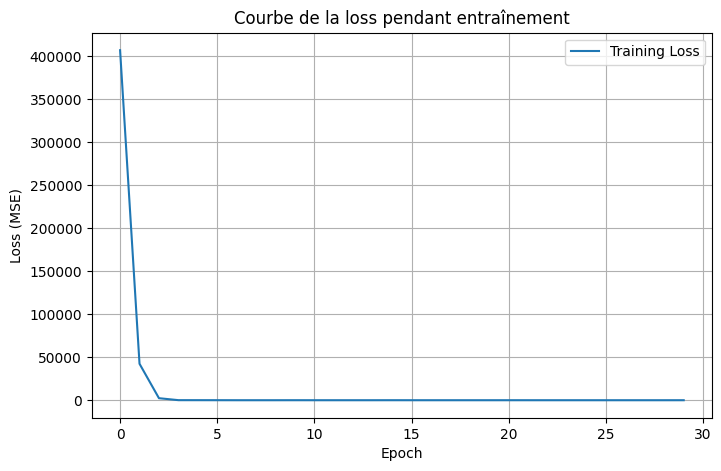

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Supposons que tu as déjà préparé X_train et y_train comme expliqué avant.

# 1. Créer dataset et dataloader
batch_size = 32
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 2. Initialiser le modèle
model = DurationForecaster(hidden_size=64)  # tu peux changer hidden_size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# 3. Définir loss et optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Boucle d'entraînement
n_epochs = 30  # nombre d'époques

losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {epoch_loss:.4f}")

# 5. Courbe de la loss
plt.figure(figsize=(8,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Courbe de la loss pendant entraînement')
plt.grid()
plt.legend()
plt.show()


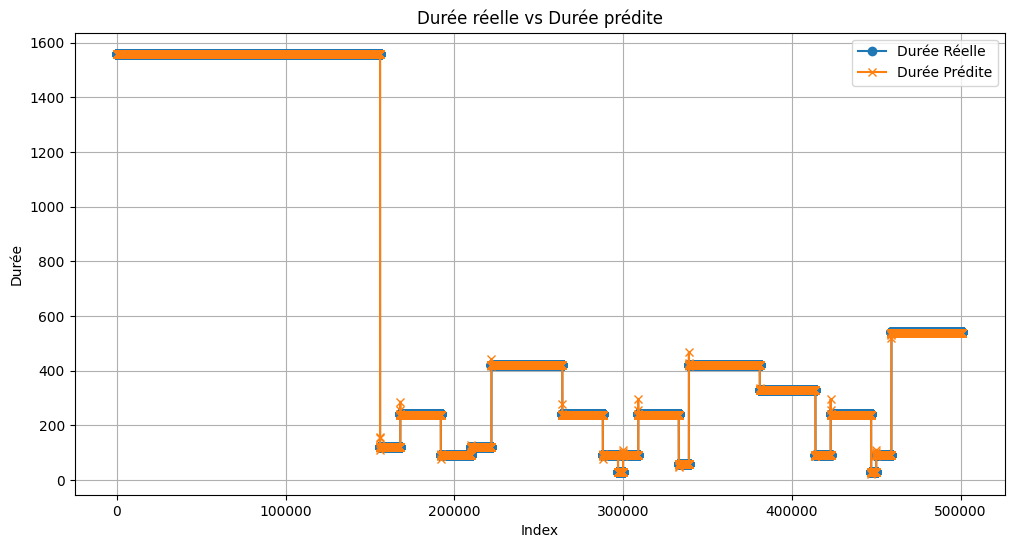

In [48]:
# 6. Évaluation du modèle (en batches pour éviter l'Out Of Memory)
model.eval()

y_true = []
y_pred = []

eval_loader = DataLoader(dataset, batch_size=32, shuffle=False)  # même batch_size que train ou plus petit

with torch.no_grad():
    for X_batch, y_batch in eval_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)

        y_true.append(y_batch.cpu())
        y_pred.append(outputs.cpu())

# 7. Concaténer tous les batches
y_true = torch.cat(y_true).numpy()
y_pred = torch.cat(y_pred).numpy()

# 8. Affichage
plt.figure(figsize=(12,6))
plt.plot(y_true, label='Durée Réelle', marker='o')
plt.plot(y_pred, label='Durée Prédite', marker='x')
plt.title('Durée réelle vs Durée prédite')
plt.xlabel('Index')
plt.ylabel('Durée')
plt.legend()
plt.grid()
plt.show()


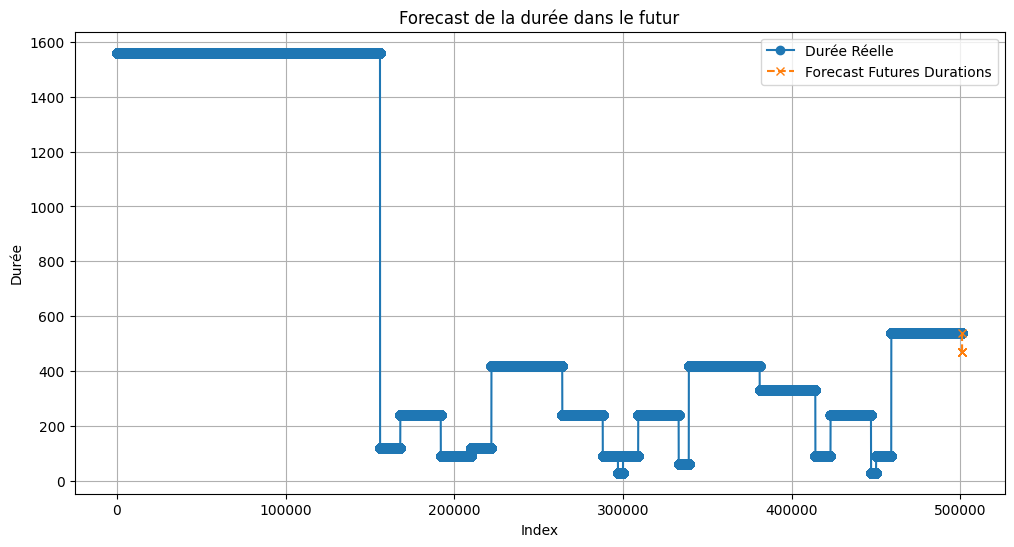

In [49]:
# 9. Forecast plusieurs steps dans le futur 🔮
forecast_steps = 100  # nombre de prédictions futures que tu veux

# Prendre le dernier X connu
X_current = X_train[-1].unsqueeze(0).to(device)  # ajouter une dimension batch

forecasted_durations = []

model.eval()
with torch.no_grad():
    for _ in range(forecast_steps):
        # prédire la prochaine duration
        duration_pred = model(X_current)

        # stocker la prédiction
        forecasted_durations.append(duration_pred.cpu().item())

        # Créer le prochain X
        # Remplacer l'ancienne duration par la nouvelle prédite
        # Supposons que la dernière feature est la "duration" (adapter selon ton X !)
        X_next = X_current.clone()
        X_next[0, -1] = duration_pred  # remplacer la dernière feature par la prédite

        X_current = X_next  # avancer
        #sauvegarder dans csv
        forecast_df = pd.DataFrame(forecasted_durations, columns=["Forecast"])
        forecast_df.to_csv("forecast_predictionsDuration.csv", index=False)

# 10. Affichage Forecast
plt.figure(figsize=(12,6))
plt.plot(range(len(y_true)), y_true, label="Durée Réelle", marker='o')
plt.plot(range(len(y_true), len(y_true) + forecast_steps), forecasted_durations, label="Forecast Futures Durations", marker='x', linestyle='--')
plt.title('Forecast de la durée dans le futur')
plt.xlabel('Index')
plt.ylabel('Durée')
plt.grid()
plt.legend()
plt.show()


In [50]:
df3=pd.read_csv("forecast_predictionsDuration.csv")
df3

,Forecast
0,537.839355
1,471.476776
2,471.476166
3,471.476166
4,471.476166
...,...
95,471.476166
96,471.476166
97,471.476166
98,471.476166


In [57]:
# Fusionner les 3 DataFrames
df_total = pd.concat([df1, df2, df3], axis=1, ignore_index=True)

# Sauvegarder le résultat
df_total.to_csv("forcast_total.csv", index=False)


In [63]:
import pandas as pd

# Charger le fichier correctement
df = pd.read_csv("forcast_total.csv")

# Créer un nouveau DataFrame dfpredite
dfpredite = pd.DataFrame()

# Assigner les colonnes correctement
dfpredite["EEG"] = df.iloc[:, 0]      # 1ʳᵉ colonne
dfpredite["EMG"] = df.iloc[:, 1]      # 2ᵉ colonne
dfpredite["Duration"] = df.iloc[:, 2] # 3ᵉ colonne
dfpredite

,EEG,EMG,Duration
0,0.000003,1.068767e-06,537.839355
1,0.000005,1.064232e-06,471.476776
2,0.000007,9.260663e-07,471.476166
3,0.000009,7.565812e-07,471.476166
4,0.000009,5.688607e-07,471.476166
...,...,...,...
95,0.000011,-1.787759e-05,471.476166
96,0.000011,-1.801059e-05,471.476166
97,0.000011,-1.814218e-05,471.476166
98,0.000011,-1.827237e-05,471.476166


/tmp/ipykernel_31/2790878940.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.tensor(X, dtype=torch.float32)


Epoch [1/30] - Loss: 411744.473601
Epoch [2/30] - Loss: 58783.350775
Epoch [3/30] - Loss: 1467.904994
Epoch [4/30] - Loss: 97.564767
Epoch [5/30] - Loss: 188.967224
Epoch [6/30] - Loss: 195.921522
Epoch [7/30] - Loss: 2522.550411
Epoch [8/30] - Loss: 419.659632
Epoch [9/30] - Loss: 105.370081
Epoch [10/30] - Loss: 68.162321
Epoch [11/30] - Loss: 98.492664
Epoch [12/30] - Loss: 10.479127
Epoch [13/30] - Loss: 6.391381
Epoch [14/30] - Loss: 6.305246
Epoch [15/30] - Loss: 276.832723
Epoch [16/30] - Loss: 877.662118
Epoch [17/30] - Loss: 159.923353
Epoch [18/30] - Loss: 699.252092
Epoch [19/30] - Loss: 6035.945742
Epoch [20/30] - Loss: 13.932292
Epoch [21/30] - Loss: 105.542136
Epoch [22/30] - Loss: 15.069950
Epoch [23/30] - Loss: 7.267852
Epoch [24/30] - Loss: 9.826197
Epoch [25/30] - Loss: 6.274213
Epoch [26/30] - Loss: 7.612705
Epoch [27/30] - Loss: 11.544738
Epoch [28/30] - Loss: 16.744876
Epoch [29/30] - Loss: 9.786291
Epoch [30/30] - Loss: 6.101225


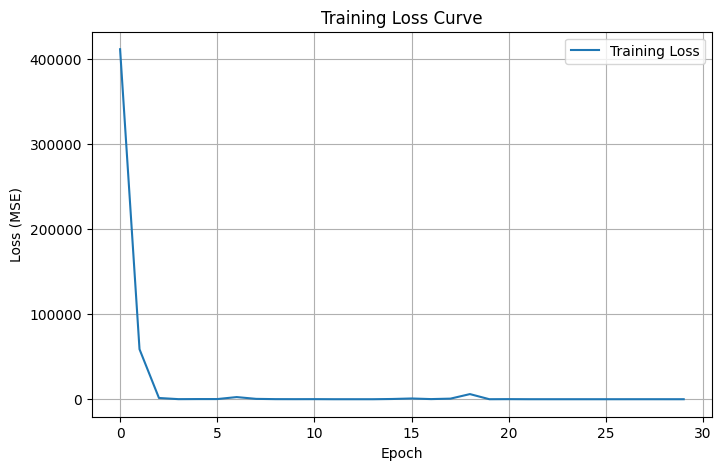

✅ Forecast sauvegardé dans forecast_durations.csv


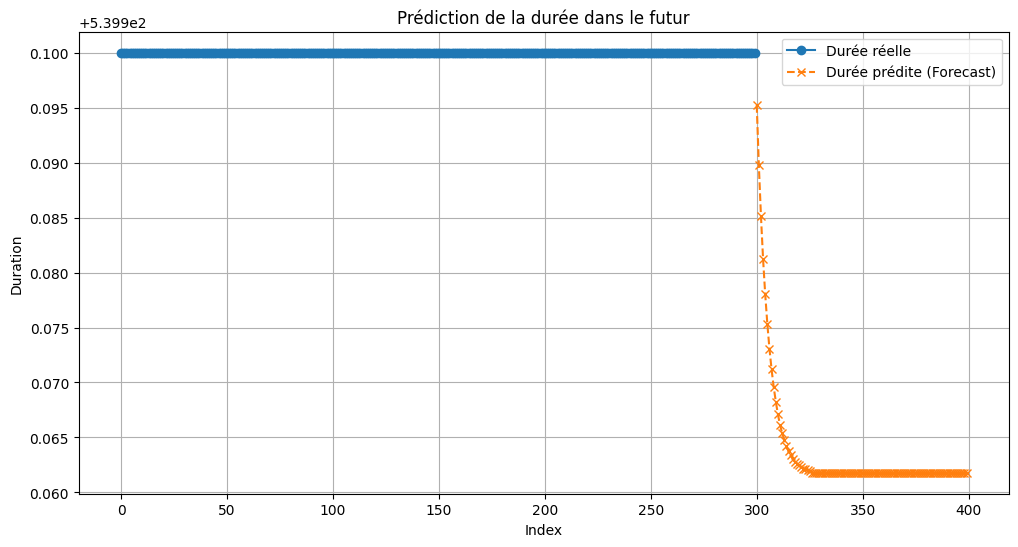

In [64]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ============================================
# 1. Charger les données
# ============================================
df =dftotal  # <-- mets ici ton chemin fichier

# Features utilisées
features = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental', 'Marker', 'Duration']
X_all = df[features].values

# ============================================
# 2. Préparer les séquences pour LSTM
# ============================================
sequence_length = 20  # nombre de pas utilisés pour prédire
X = []
y = []

for i in range(len(X_all) - sequence_length):
    X.append(X_all[i:i+sequence_length])
    y.append(X_all[i+sequence_length, -1])  # on prédit la prochaine Duration

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # ajouter dimension pour MSELoss

# ============================================
# 3. Définir modèle LSTM
# ============================================
class DurationLSTM(nn.Module):
    def __init__(self, input_size=6, hidden_size=64, num_layers=1):
        super(DurationLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# ============================================
# 4. Setup entraînement
# ============================================
batch_size = 32
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = DurationLSTM(input_size=X.shape[2]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ============================================
# 5. Boucle d'entraînement
# ============================================
n_epochs = 30
losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {epoch_loss:.6f}")

# Courbe de loss
plt.figure(figsize=(8,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Curve')
plt.grid()
plt.legend()
plt.show()

# ============================================
# 6. Forecast : prédire plusieurs steps futurs
# ============================================
forecast_steps = 100  # combien de futures prédictions

# prendre le dernier batch connu
X_current = X[-1].unsqueeze(0).to(device)  # (1, sequence_length, 6)

forecasted_durations = []

model.eval()
with torch.no_grad():
    for _ in range(forecast_steps):
        duration_pred = model(X_current)  # prédire prochaine duration
        forecasted_durations.append(duration_pred.cpu().item())

        # construire nouveau X
        X_next = X_current.clone()
        new_entry = X_next[0, 1:, :].clone()  # décaler à gauche
        last_features = X_next[0, -1, :].clone()

        # Mettre à jour la feature "Duration" de la dernière ligne
        last_features[-1] = duration_pred  # remplacer ancienne duration par prédite

        # Créer le nouveau X
        X_current = torch.cat([new_entry, last_features.unsqueeze(0)], dim=0).unsqueeze(0).to(device)

# ============================================
# 7. Sauvegarder prédictions dans CSV
# ============================================
forecast_df = pd.DataFrame(forecasted_durations, columns=["Forecasted_Duration"])
forecast_df.to_csv("forecast_durations.csv", index=False)
print("✅ Forecast sauvegardé dans forecast_durations.csv")

# ============================================
# 8. Tracer vraies vs prédites
# ============================================
# Vraies durations (les dernières vraies du training)
true_durations = df['Duration'].values[-300:]  # affiche dernières vraies valeurs (ex: 300 points)

plt.figure(figsize=(12,6))
plt.plot(range(len(true_durations)), true_durations, label='Durée réelle', marker='o')
plt.plot(range(len(true_durations), len(true_durations) + forecast_steps), forecasted_durations, label='Durée prédite (Forecast)', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Duration')
plt.title('Prédiction de la durée dans le futur')
plt.grid()
plt.legend()
plt.show()


        EEG           EMG    Duration  Sleep_Stage_Prediction
0  0.000003  1.068767e-06  537.839355                      -1
1  0.000005  1.064232e-06  471.476776                      -1
2  0.000007  9.260663e-07  471.476166                      -1
3  0.000009  7.565812e-07  471.476166                      -1
4  0.000009  5.688607e-07  471.476166                      -1
X_seq shape: (90, 10, 2)
y_seq shape: (90,)
Epoch [1/10], Loss: 1.4265
Epoch [2/10], Loss: 1.3617
Epoch [3/10], Loss: 1.2937
Epoch [4/10], Loss: 1.2142
Epoch [5/10], Loss: 1.0985
Epoch [6/10], Loss: 0.9259
Epoch [7/10], Loss: 0.6441
Epoch [8/10], Loss: 0.3676
Epoch [9/10], Loss: 0.1981
Epoch [10/10], Loss: 0.1997


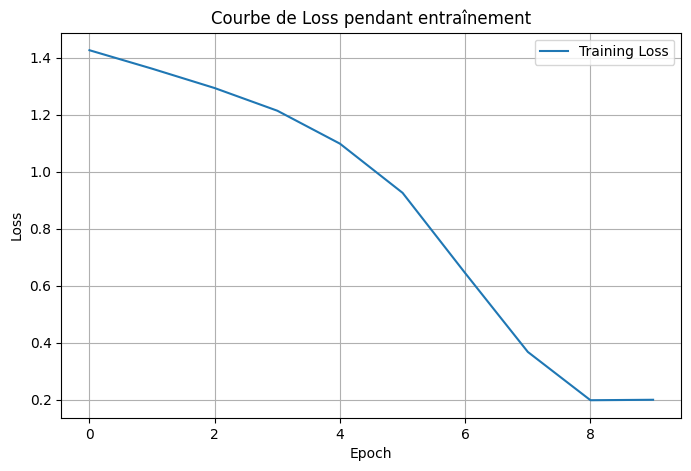

         EEG           EMG    Duration  Sleep_Stage_Prediction  \
0   0.000003  1.068767e-06  537.839355                       0   
1   0.000005  1.064232e-06  471.476776                       0   
2   0.000007  9.260663e-07  471.476166                       0   
3   0.000009  7.565812e-07  471.476166                       0   
4   0.000009  5.688607e-07  471.476166                       0   
5   0.000009  3.691559e-07  471.476166                       0   
6   0.000008  1.627583e-07  471.476166                       0   
7   0.000007 -5.201933e-08  471.476166                       0   
8   0.000005 -2.759877e-07  471.476166                       0   
9   0.000004 -5.081352e-07  471.476166                       0   
10  0.000003 -7.432852e-07  471.476166                       0   
11  0.000003 -9.815470e-07  471.476166                       0   
12  0.000003 -1.225598e-06  471.476166                       0   
13  0.000004 -1.472301e-06  471.476166                       0   
14  0.0000

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (4).

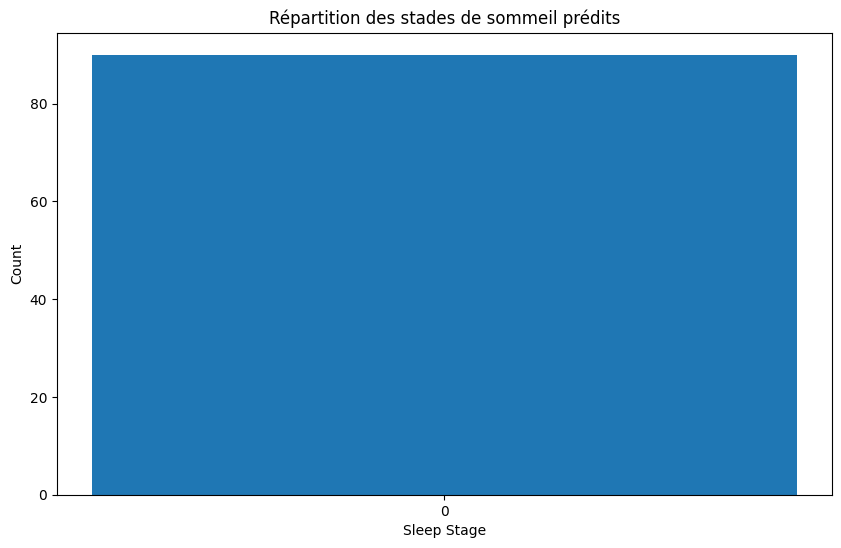

In [70]:
# 1. Imports
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 2. Charger ton fichier
# Remarque: Assurez-vous que 'dfpredite' est défini correctement dans votre script d'origine
# Si vous chargez depuis un fichier CSV, utilisez plutôt:
# df = pd.read_csv("votre_fichier.csv")
df = dfpredite
print(df.head())

# 3. Préparer X (features) et générer des labels simulés pour entraînement
X = df[["EEG", "EMG"]].values  # entrées

# 4. Simuler des labels (exemple simple pour l'apprentissage)
# Corrigé: Utiliser des labels de 0 à 3 au lieu de 0 à 4
labels = []
for eeg, emg in zip(X[:, 0], X[:, 1]):
    if abs(emg) < 1e-6 and eeg > 1e-6:
        labels.append(3)  # REM Sleep (corrigé: 4 -> 3)
    elif abs(emg) < 1e-6:
        labels.append(2)  # N3 (deep sleep) (corrigé: 3 -> 2)
    elif eeg > 1e-6:
        labels.append(0)  # Wake
    else:
        labels.append(1)  # N2 (light sleep) (corrigé: 2 -> 1)
labels = np.array(labels)

# 5. Créer des séquences
window_size = 10
X_seq = []
y_seq = []
for i in range(len(X) - window_size):
    X_seq.append(X[i:i+window_size])
    y_seq.append(labels[i+window_size-1])  # le label du dernier élément de la séquence
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)

# 6. Tensor conversion
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

# 7. Dataset et DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 8. Définir le modèle LSTM
class SleepStageClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, num_layers=2, num_classes=4):
        super(SleepStageClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # on prend la dernière sortie
        out = self.fc(out)
        return out

# 9. Initialiser modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SleepStageClassifier()
model = model.to(device)

# 10. Loss et Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 11. Entraînement
n_epochs = 10
losses = []
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {epoch_loss:.4f}")

# 12. Visualiser la perte
plt.figure(figsize=(8,5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Courbe de Loss pendant entraînement")
plt.legend()
plt.grid()
plt.show()

# 13. Prédictions sur tout ton DataFrame (en séquentiel)
# Préparer les séquences pour toutes les données
X_full = []
for i in range(len(X) - window_size):
    X_full.append(X[i:i+window_size])
X_full = np.array(X_full)
X_full_tensor = torch.tensor(X_full, dtype=torch.float32).to(device)

# Prédire
model.eval()
sleep_stage_preds = []
with torch.no_grad():
    outputs = model(X_full_tensor)
    _, predicted = torch.max(outputs, 1)
    sleep_stage_preds = predicted.cpu().numpy()

# Correction: Remplacer les valeurs -1 pour les premières lignes par la première prédiction
first_pred = sleep_stage_preds[0]  # Prendre la première prédiction disponible
predicted_full = [first_pred] * window_size + list(sleep_stage_preds)

# 14. Ajouter les prédictions au DataFrame
df["Sleep_Stage_Prediction"] = predicted_full

# 15. Mapper les prédictions numériques aux noms des stades de sommeil pour plus de clarté
stage_names = {
    0: "Wake",
    1: "N2 (light sleep)",
    2: "N3 (deep sleep)",
    3: "REM Sleep"
}

df["Sleep_Stage_Name"] = df["Sleep_Stage_Prediction"].map(stage_names)

# 16. Sauvegarder ou afficher
print(df.head(20))  # voir les premières lignes
df.to_csv("forcast_with_sleep_stage.csv", index=False)

# 17. Afficher la répartition des prédictions
# Compter le nombre d'instances de chaque classe prédite
class_counts = np.bincount(sleep_stage_preds)
class_names = ["Wake", "N2 (light sleep)", "N3 (deep sleep)", "REM Sleep"]

# Afficher un histogramme des prédictions
plt.figure(figsize=(10, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Sleep Stage")
plt.ylabel("Count")
plt.title("Répartition des stades de sommeil prédits")
plt.xticks(range(len(class_counts)), class_names)
plt.grid(axis='y')
plt.show()

# 18. Visualiser l'évolution des stades de sommeil dans le temps
plt.figure(figsize=(15, 6))
plt.plot(df.index, df["Sleep_Stage_Prediction"], 'o-', markersize=2)
plt.yticks(range(4), class_names)
plt.xlabel("Index temporel")
plt.ylabel("Stade de sommeil")
plt.title("Évolution des stades de sommeil dans le temps")
plt.grid(True)
plt.show()

In [71]:
dfstade=pd.read_csv("forcast_with_sleep_stage.csv")
dfstade

,EEG,EMG,Duration,Sleep_Stage_Prediction,Sleep_Stage_Name
0,0.000003,1.068767e-06,537.839355,0,Wake
1,0.000005,1.064232e-06,471.476776,0,Wake
2,0.000007,9.260663e-07,471.476166,0,Wake
3,0.000009,7.565812e-07,471.476166,0,Wake
4,0.000009,5.688607e-07,471.476166,0,Wake
...,...,...,...,...,...
95,0.000011,-1.787759e-05,471.476166,0,Wake
96,0.000011,-1.801059e-05,471.476166,0,Wake
97,0.000011,-1.814218e-05,471.476166,0,Wake
98,0.000011,-1.827237e-05,471.476166,0,Wake


        EEG           EMG    Duration  Sleep_Stage_Prediction Sleep_Stage_Name
0  0.000003  1.068767e-06  537.839355                       0             Wake
1  0.000005  1.064232e-06  471.476776                       0             Wake
2  0.000007  9.260663e-07  471.476166                       0             Wake
3  0.000009  7.565812e-07  471.476166                       0             Wake
4  0.000009  5.688607e-07  471.476166                       0             Wake
Distribution des stades de sommeil dans les données d'entraînement:
  Wake: 84 (84.0%)
  N2 (light sleep): 9 (9.0%)
  N3 (deep sleep): 4 (4.0%)
  REM Sleep: 3 (3.0%)
X_seq shape: (90, 10, 2)
y_seq shape: (90,)
Epoch [1/30], Train Loss: 1.3181, Val Loss: 1.2903


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [2/30], Train Loss: 1.2779, Val Loss: 1.2367
Epoch [3/30], Train Loss: 1.2039, Val Loss: 1.1306
Epoch [4/30], Train Loss: 1.0401, Val Loss: 0.8197
Epoch [5/30], Train Loss: 0.7421, Val Loss: 0.5088
Epoch [6/30], Train Loss: 0.5222, Val Loss: 0.4972
Epoch [7/30], Train Loss: 0.5478, Val Loss: 0.5020
Epoch [8/30], Train Loss: 0.4572, Val Loss: 0.4809
Epoch [9/30], Train Loss: 0.5483, Val Loss: 0.4566
Epoch [10/30], Train Loss: 0.4793, Val Loss: 0.4342
Epoch [11/30], Train Loss: 0.4177, Val Loss: 0.4251
Epoch [12/30], Train Loss: 0.3841, Val Loss: 0.4244
Epoch [13/30], Train Loss: 0.4148, Val Loss: 0.4208
Epoch [14/30], Train Loss: 0.4368, Val Loss: 0.4165
Epoch [15/30], Train Loss: 0.4581, Val Loss: 0.4146
Epoch [16/30], Train Loss: 0.4413, Val Loss: 0.4134
Epoch [17/30], Train Loss: 0.4054, Val Loss: 0.4137
Epoch [18/30], Train Loss: 0.3586, Val Loss: 0.4144
Epoch [19/30], Train Loss: 0.4283, Val Loss: 0.4156
Epoch [20/30], Train Loss: 0.4369, Val Loss: 0.4157
Epoch [21/30], Train

/tmp/ipykernel_31/2074240017.py:163: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_sleep_model.pth'))


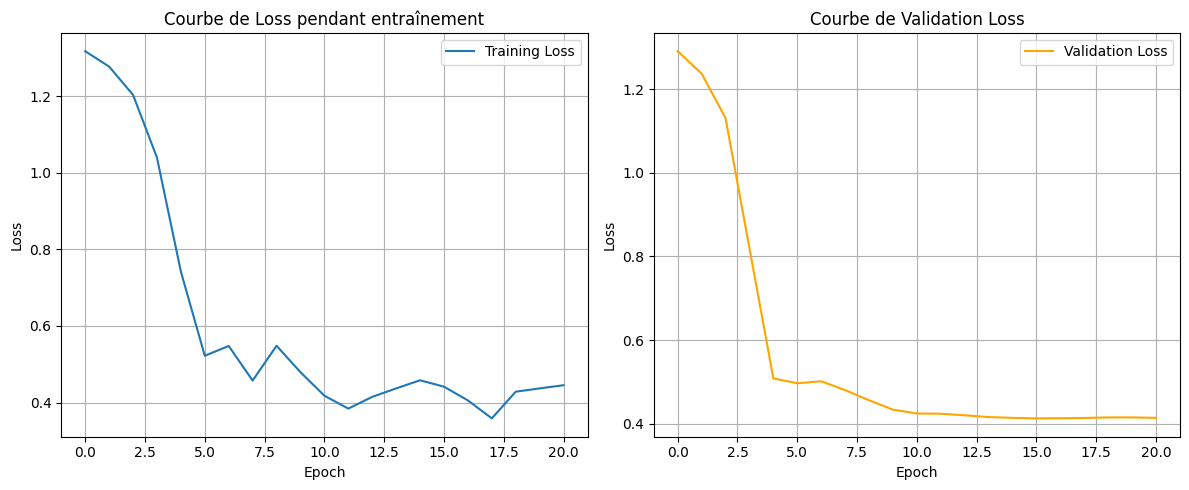


Résultats de classification:
         EEG           EMG Sleep_Stage_Name Is_Deep_Sleep
0   0.000003  1.068767e-06             Wake           NON
1   0.000005  1.064232e-06             Wake           NON
2   0.000007  9.260663e-07             Wake           NON
3   0.000009  7.565812e-07             Wake           NON
4   0.000009  5.688607e-07             Wake           NON
5   0.000009  3.691559e-07             Wake           NON
6   0.000008  1.627583e-07             Wake           NON
7   0.000007 -5.201933e-08             Wake           NON
8   0.000005 -2.759877e-07             Wake           NON
9   0.000004 -5.081352e-07             Wake           NON
10  0.000003 -7.432852e-07             Wake           NON
11  0.000003 -9.815470e-07             Wake           NON
12  0.000003 -1.225598e-06             Wake           NON
13  0.000004 -1.472301e-06             Wake           NON
14  0.000006 -1.722945e-06             Wake           NON
15  0.000007 -1.973716e-06             Wak

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (4).

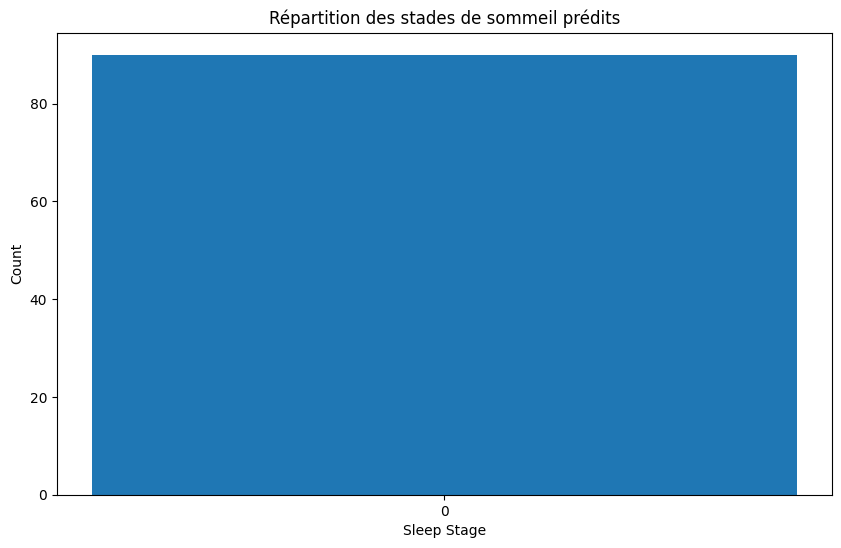

In [72]:
# 1. Imports
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 2. Charger ton fichier
# Remarque: Assurez-vous que 'dfpredite' est défini correctement dans votre script d'origine
# Si vous chargez depuis un fichier CSV, utilisez plutôt:
# df = pd.read_csv("votre_fichier.csv")
df = dfpredite
print(df.head())

# 3. Préparer X (features) et générer des labels simulés pour entraînement
X = df[["EEG", "EMG"]].values  # entrées

# 4. Simuler des labels avec une LOGIQUE MODIFIÉE pour favoriser la détection de stades N3 et REM
labels = []
for eeg, emg in zip(X[:, 0], X[:, 1]):
    # Amélioration: rendre les critères plus sensibles aux stades profonds (N3) et REM
    
    # REM (stade 3): EMG très bas et EEG modéré à élevé (activité cérébrale pendant le rêve)
    if abs(emg) < 5e-7 and eeg > 5e-6:
        labels.append(3)  # REM Sleep
    
    # N3 (stade 2): EMG bas et EEG bas (sommeil profond)
    elif abs(emg) < 1e-6 and eeg < 5e-6:
        labels.append(2)  # N3 (deep sleep)
    
    # N2 (stade 1): EMG modéré, EEG variable (sommeil léger)
    elif abs(emg) < 2e-6:
        labels.append(1)  # N2 (light sleep)
    
    # Wake (stade 0): EMG élevé ou EEG très élevé (éveil)
    else:
        labels.append(0)  # Wake

labels = np.array(labels)

# Afficher la distribution des labels générés
print("Distribution des stades de sommeil dans les données d'entraînement:")
for stage, count in enumerate(np.bincount(labels)):
    stage_names = ["Wake", "N2 (light sleep)", "N3 (deep sleep)", "REM Sleep"]
    print(f"  {stage_names[stage]}: {count} ({count/len(labels)*100:.1f}%)")

# 5. Créer des séquences
window_size = 10
X_seq = []
y_seq = []
for i in range(len(X) - window_size):
    X_seq.append(X[i:i+window_size])
    y_seq.append(labels[i+window_size-1])  # le label du dernier élément de la séquence
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)

# 6. Tensor conversion
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

# 7. Dataset et DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 8. Définir le modèle LSTM avec plus de couches et unités pour mieux détecter les schémas complexes
class SleepStageClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, num_layers=3, num_classes=4):  # Plus de capacité
        super(SleepStageClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1),
            nn.Softmax(dim=1)
        )
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        # LSTM output
        lstm_out, _ = self.lstm(x)  # lstm_out: [batch, seq_len, hidden_size]
        
        # Self-attention pour donner plus de poids aux patterns importants
        attn_weights = self.attention(lstm_out)  # [batch, seq_len, 1]
        context = torch.sum(attn_weights * lstm_out, dim=1)  # [batch, hidden_size]
        
        # Classification avec couches denses
        out = self.fc1(context)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# 9. Initialiser modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SleepStageClassifier()
model = model.to(device)

# 10. Loss et Optimizer
# Ajuster la fonction de perte pour mettre l'accent sur les stades N3 et REM
class_weights = torch.tensor([0.8, 0.8, 1.5, 1.5], dtype=torch.float32).to(device)  # Plus de poids pour N3 et REM
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# 11. Learning rate scheduler pour améliorer la convergence
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# 12. Entraînement avec early stopping
n_epochs = 30  # Plus d'epochs pour un meilleur apprentissage
losses = []
val_losses = []
best_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    
    # Validation (utilisant les données d'entraînement comme proxy)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_tensor.to(device))
        val_loss = criterion(val_outputs, y_tensor.to(device)).item()
        val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{n_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    # Learning rate scheduler
    scheduler.step(val_loss)
    
    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Sauvegarder le meilleur modèle
        torch.save(model.state_dict(), 'best_sleep_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered après {epoch+1} epochs")
            break

# Charger le meilleur modèle
model.load_state_dict(torch.load('best_sleep_model.pth'))

# 13. Visualiser les courbes d'apprentissage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Courbe de Loss pendant entraînement")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(val_losses, label="Validation Loss", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Courbe de Validation Loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 14. Prédictions sur tout ton DataFrame
X_full = []
for i in range(len(X) - window_size):
    X_full.append(X[i:i+window_size])
X_full = np.array(X_full)
X_full_tensor = torch.tensor(X_full, dtype=torch.float32).to(device)

# Prédire avec plus de détails sur les probabilités
model.eval()
sleep_stage_preds = []
sleep_stage_probs = []  # Pour stocker les probabilités de chaque classe

with torch.no_grad():
    outputs = model(X_full_tensor)
    probs = torch.softmax(outputs, dim=1)
    sleep_stage_probs = probs.cpu().numpy()
    _, predicted = torch.max(outputs, 1)
    sleep_stage_preds = predicted.cpu().numpy()

# Utiliser la première prédiction pour remplir les valeurs initiales
first_pred = sleep_stage_preds[0]
predicted_full = [first_pred] * window_size + list(sleep_stage_preds)

# 15. Ajouter les prédictions au DataFrame
df["Sleep_Stage_Prediction"] = predicted_full

# Mapper les prédictions numériques aux noms des stades
stage_names = {
    0: "Wake",
    1: "N2 (light sleep)",
    2: "N3 (deep sleep)",
    3: "REM Sleep"
}

df["Sleep_Stage_Name"] = df["Sleep_Stage_Prediction"].map(stage_names)

# 16. Ajouter une colonne pour indiquer si le patient est dans un stade de sommeil profond ou REM
df["Is_Deep_Sleep"] = df["Sleep_Stage_Prediction"].apply(lambda x: "OUI" if x in [2, 3] else "NON")

# 17. Afficher et sauvegarder les résultats
print("\nRésultats de classification:")
print(df[["EEG", "EMG", "Sleep_Stage_Name", "Is_Deep_Sleep"]].head(20))

df.to_csv("forcast_with_sleep_stage_detailed.csv", index=False)

# 18. Afficher la répartition des prédictions
class_counts = np.bincount(sleep_stage_preds)
class_names = ["Wake", "N2 (light sleep)", "N3 (deep sleep)", "REM Sleep"]

plt.figure(figsize=(10, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Sleep Stage")
plt.ylabel("Count")
plt.title("Répartition des stades de sommeil prédits")
plt.xticks(range(len(class_counts)), class_names)
plt.grid(axis='y')

# Ajouter les pourcentages
for i, count in enumerate(class_counts):
    percentage = count / len(sleep_stage_preds) * 100
    plt.text(i, count + 5, f"{percentage:.1f}%", ha='center')

plt.show()

# 19. Visualiser l'évolution des stades de sommeil dans le temps
plt.figure(figsize=(15, 6))
plt.plot(df.index, df["Sleep_Stage_Prediction"], 'o-', markersize=2)
plt.yticks(range(4), class_names)
plt.xlabel("Index temporel")
plt.ylabel("Stade de sommeil")
plt.title("Évolution des stades de sommeil dans le temps")
plt.grid(True)

# Ajouter une zone colorée pour les stades de sommeil profond (N3 et REM)
plt.axhspan(1.5, 3.5, alpha=0.3, color='green', label='Zone de sommeil profond ou REM')
plt.legend()
plt.show()

# 20. Analyser la continuité des stades de sommeil (recherche de cycles)
stage_changes = np.diff(df["Sleep_Stage_Prediction"].values)
change_indices = np.where(stage_changes != 0)[0]
stage_durations = np.diff(np.append(change_indices, len(df)))

print("\nAnalyse des cycles de sommeil:")
print(f"Nombre de changements de stade: {len(change_indices)}")
print(f"Durée moyenne d'un stade: {np.mean(stage_durations):.1f} points")

# 21. Calculer des statistiques sur les stades de sommeil profond ou REM
deep_sleep_count = np.sum(df["Sleep_Stage_Prediction"].isin([2, 3]))
deep_sleep_percentage = deep_sleep_count / len(df) * 100

print(f"\nRésumé du sommeil du patient:")
print(f"Temps total dans les stades de sommeil profond (N3) ou REM: {deep_sleep_percentage:.1f}%")

# Conclusion avec recommandation
if deep_sleep_percentage < 20:
    print("\nLe patient a un pourcentage de sommeil profond/REM significativement inférieur à la normale (20-25%).")
    print("Recommandation: Consulter un spécialiste du sommeil pour évaluation complémentaire.")
elif deep_sleep_percentage > 30:
    print("\nLe patient a un pourcentage de sommeil profond/REM relativement élevé.")
    print("La qualité du sommeil semble adéquate du point de vue des stades profonds.")
else:
    print("\nLe patient a un pourcentage de sommeil profond/REM dans les normes habituelles.")
    print("La distribution des stades de sommeil paraît normale.")

Colonnes disponibles: ['EEG', 'EMG', 'Duration', 'Sleep_Stage_Prediction', 'Sleep_Stage_Name']
Premières lignes du DataFrame:
        EEG           EMG    Duration  Sleep_Stage_Prediction Sleep_Stage_Name
0  0.000003  1.068767e-06  537.839355                       0             Wake
1  0.000005  1.064232e-06  471.476776                       0             Wake
2  0.000007  9.260663e-07  471.476166                       0             Wake
3  0.000009  7.565812e-07  471.476166                       0             Wake
4  0.000009  5.688607e-07  471.476166                       0             Wake

Résultats de la détection d'apnée:
Nombre d'événements d'apnée détectés: 0.0 points sur 100
Pourcentage du temps avec apnée: 0.00%
Nombre d'épisodes d'apnée distincts: 0

Estimation de l'Index d'Apnée-Hypopnée (IAH): 0.00 événements/heure
Classification de la sévérité: Normal (< 5)


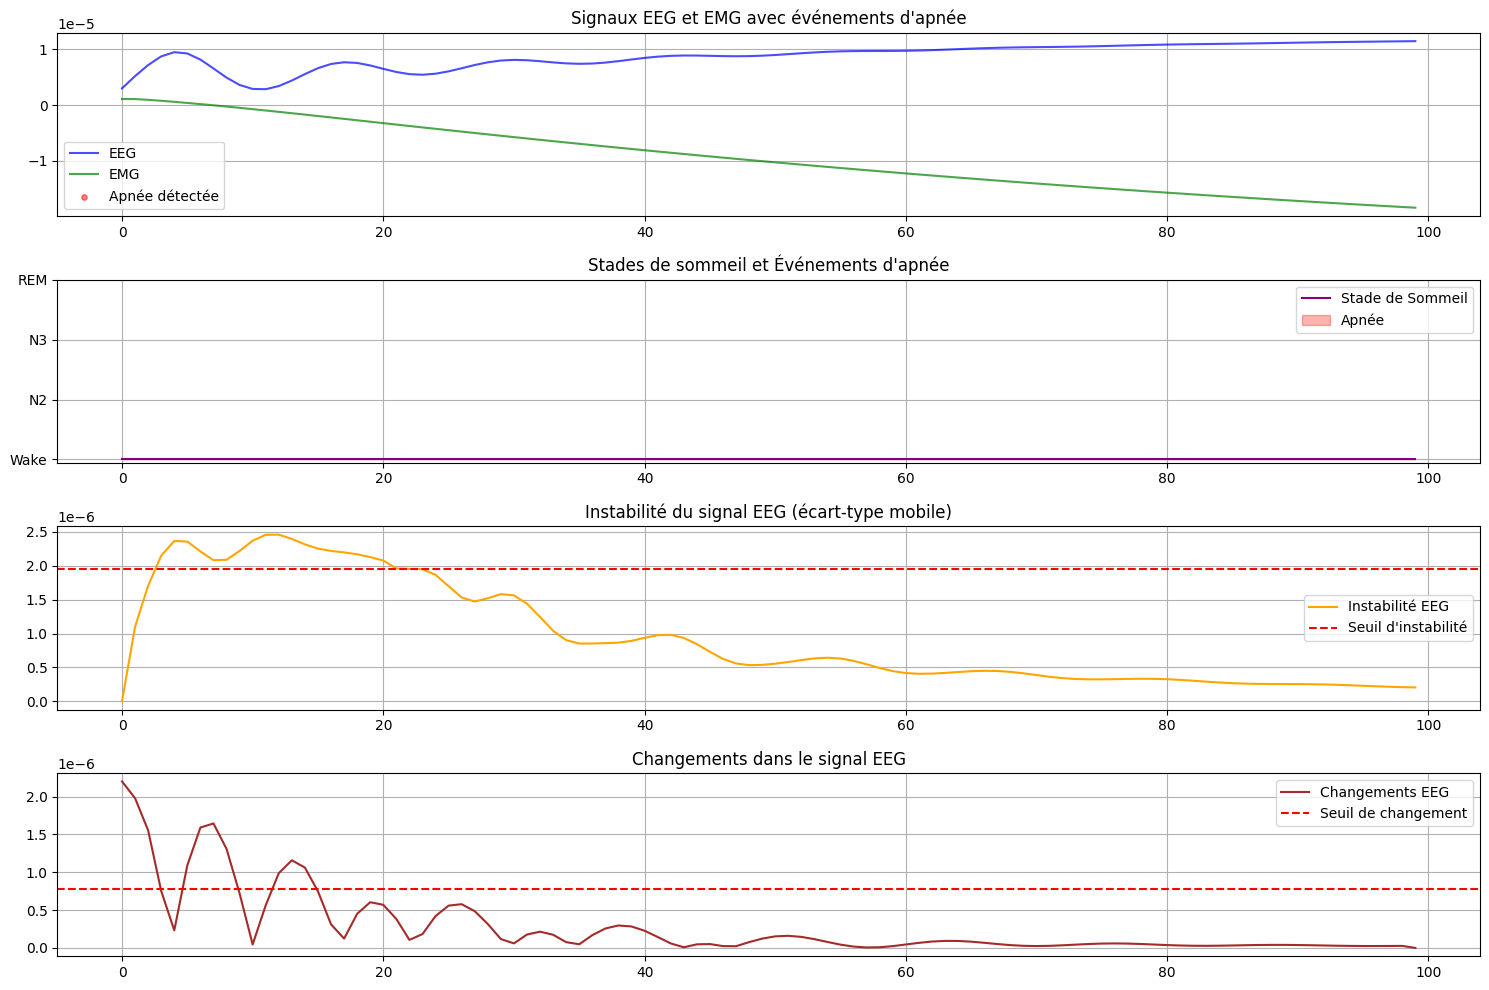


Le DataFrame avec la détection d'apnée a été enregistré dans 'forcast_with_apnea_detection.csv'

Répartition des apnées par stade de sommeil:


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Charger les données
dfapne = pd.read_csv("forcast_with_sleep_stage.csv")

# Vérification des colonnes disponibles
print("Colonnes disponibles:", dfapne.columns.tolist())
print("Premières lignes du DataFrame:")
print(dfapne.head())

# Fonction pour détecter les apnées basée sur les signaux EEG et EMG
def detect_apnea(df, window_size=20):
    """
    Détecte les potentielles apnées du sommeil basées sur:
    1. Les variations du signal EEG
    2. Les niveaux très bas d'EMG
    3. Le stade de sommeil (les apnées sont plus fréquentes en sommeil REM et N2)
    """
    # Initialiser la colonne d'apnée
    apnea = np.zeros(len(df))
    
    # Calculer la variation de l'EEG (instabilité)
    eeg_signal = df['EEG'].values
    eeg_rolling_std = np.array([np.std(eeg_signal[max(0, i-window_size):i+1]) 
                               for i in range(len(eeg_signal))])
    
    # Calculer la moyenne mobile de l'EMG (pour détecter les chutes d'EMG)
    emg_signal = df['EMG'].values
    emg_rolling_mean = np.array([np.mean(emg_signal[max(0, i-window_size):i+1]) 
                                for i in range(len(emg_signal))])
    
    # Détecter les changements soudains dans le signal EEG (potentiels microéveils)
    eeg_change = np.abs(np.diff(np.append(eeg_signal, eeg_signal[-1])))
    
    # Les seuils pour l'identification des apnées (à ajuster selon vos données)
    eeg_instability_threshold = np.percentile(eeg_rolling_std, 80)  # Instabilité EEG élevée
    emg_low_threshold = np.percentile(emg_rolling_mean, 20)        # EMG faible
    eeg_change_threshold = np.percentile(eeg_change, 90)           # Changements EEG importants

    # Détection des apnées
    for i in range(window_size, len(df)):
        # Vérifier si nous sommes dans un stade de sommeil propice aux apnées (REM ou N2)
        sleep_stage = df['Sleep_Stage_Prediction'].iloc[i]
        is_rem_or_light_sleep = sleep_stage in [1, 3]  # N2 (light sleep) ou REM
        
        # Calculer les critères pour cette position
        high_eeg_instability = eeg_rolling_std[i] > eeg_instability_threshold
        low_emg = emg_rolling_mean[i] < emg_low_threshold
        sudden_eeg_change = eeg_change[i] > eeg_change_threshold
        
        # Détecter l'apnée si nous avons une instabilité EEG OU un changement soudain d'EEG
        # ET un EMG faible ET nous sommes dans un stade de sommeil approprié
        if (high_eeg_instability or sudden_eeg_change) and low_emg and is_rem_or_light_sleep:
            # Marquer les N points avant comme faisant partie de l'événement d'apnée
            apnea_event_length = min(15, i)  # Maximum 15 points ou jusqu'au début
            apnea[i-apnea_event_length:i+1] = 1
    
    return apnea, eeg_rolling_std, emg_rolling_mean, eeg_change

# Appliquer la détection d'apnée
apnea_events, eeg_instability, emg_trend, eeg_changes = detect_apnea(dfapne)

# Ajouter les résultats au DataFrame
dfapne['Apnea_Detected'] = apnea_events
dfapne['Apnea_Status'] = dfapne['Apnea_Detected'].map({0: 'Non', 1: 'Oui'})
dfapne['EEG_Instability'] = eeg_instability
dfapne['EMG_Trend'] = emg_trend
dfapne['EEG_Change'] = eeg_changes

# Afficher les statistiques des apnées détectées
apnea_count = dfapne['Apnea_Detected'].sum()
total_points = len(dfapne)
apnea_percentage = (apnea_count / total_points) * 100

print(f"\nRésultats de la détection d'apnée:")
print(f"Nombre d'événements d'apnée détectés: {apnea_count} points sur {total_points}")
print(f"Pourcentage du temps avec apnée: {apnea_percentage:.2f}%")

# Identifier les épisodes d'apnée (séquences consécutives)
dfapne['Apnea_Episode'] = (dfapne['Apnea_Detected'].diff() == 1).cumsum() * dfapne['Apnea_Detected']
episode_counts = dfapne[dfapne['Apnea_Episode'] > 0]['Apnea_Episode'].value_counts()
episode_count = len(episode_counts)

print(f"Nombre d'épisodes d'apnée distincts: {episode_count}")

# Calcul de l'Index d'Apnée-Hypopnée (approximation basée sur la durée totale)
# Supposons que chaque point représente environ 30 secondes
point_duration_sec = 30  # À ajuster selon vos données réelles
recording_hours = (total_points * point_duration_sec) / 3600
ahi = episode_count / recording_hours if recording_hours > 0 else 0

print(f"\nEstimation de l'Index d'Apnée-Hypopnée (IAH): {ahi:.2f} événements/heure")
if ahi < 5:
    severity = "Normal (< 5)"
elif ahi < 15:
    severity = "Légère (5-15)"
elif ahi < 30:
    severity = "Modérée (15-30)"
else:
    severity = "Sévère (> 30)"
print(f"Classification de la sévérité: {severity}")

# Visualiser les résultats
plt.figure(figsize=(15, 10))

# Plot 1: EEG et EMG avec superposition des apnées
plt.subplot(4, 1, 1)
plt.plot(dfapne.index, dfapne['EEG'], label='EEG', color='blue', alpha=0.7)
plt.plot(dfapne.index, dfapne['EMG'], label='EMG', color='green', alpha=0.7)
plt.scatter(dfapne[dfapne['Apnea_Detected'] == 1].index, 
            dfapne[dfapne['Apnea_Detected'] == 1]['EEG'],
            color='red', s=15, alpha=0.5, label='Apnée détectée')
plt.title('Signaux EEG et EMG avec événements d\'apnée')
plt.legend()
plt.grid(True)

# Plot 2: Stades de sommeil et apnées
plt.subplot(4, 1, 2)
plt.plot(dfapne.index, dfapne['Sleep_Stage_Prediction'], label='Stade de Sommeil', color='purple')
plt.fill_between(dfapne.index, 0, dfapne['Apnea_Detected']*3, color='red', alpha=0.3, label='Apnée')
plt.yticks([0, 1, 2, 3], ['Wake', 'N2', 'N3', 'REM'])
plt.title('Stades de sommeil et Événements d\'apnée')
plt.legend()
plt.grid(True)

# Plot 3: Instabilité EEG
plt.subplot(4, 1, 3)
plt.plot(dfapne.index, dfapne['EEG_Instability'], label='Instabilité EEG', color='orange')
plt.axhline(y=np.percentile(eeg_instability, 80), color='r', linestyle='--', 
           label='Seuil d\'instabilité')
plt.title('Instabilité du signal EEG (écart-type mobile)')
plt.legend()
plt.grid(True)

# Plot 4: Changements EEG
plt.subplot(4, 1, 4)
plt.plot(dfapne.index, dfapne['EEG_Change'], label='Changements EEG', color='brown')
plt.axhline(y=np.percentile(eeg_changes, 90), color='r', linestyle='--', 
           label='Seuil de changement')
plt.title('Changements dans le signal EEG')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('apnea_detection_results.png', dpi=300)
plt.show()

# Enregistrer le DataFrame mis à jour
dfapne.to_csv("forcast_with_apnea_detection.csv", index=False)

print("\nLe DataFrame avec la détection d'apnée a été enregistré dans 'forcast_with_apnea_detection.csv'")

# Résumé des épisodes d'apnée par stade de sommeil
apnea_by_stage = dfapne[dfapne['Apnea_Detected'] == 1].groupby('Sleep_Stage_Prediction').size()
total_by_stage = dfapne.groupby('Sleep_Stage_Prediction').size()
percentage_by_stage = (apnea_by_stage / total_by_stage * 100).fillna(0)

print("\nRépartition des apnées par stade de sommeil:")
for stage, count in apnea_by_stage.items():
    stage_name = {0: "Wake", 1: "N2 (light sleep)", 2: "N3 (deep sleep)", 3: "REM Sleep"}.get(stage, f"Unknown ({stage})")
    percentage = percentage_by_stage[stage]
    print(f"  {stage_name}: {count} événements ({percentage:.2f}% du temps dans ce stade)")

In [76]:
dfapnea=pd.read_csv("forcast_with_apnea_detection.csv")
dfapnea

,EEG,EMG,Duration,Sleep_Stage_Prediction,Sleep_Stage_Name,Apnea_Detected,Apnea_Status,EEG_Instability,EMG_Trend,EEG_Change,Apnea_Episode
0,0.000003,1.068767e-06,537.839355,0,Wake,0.0,Non,0.000000e+00,1.068767e-06,2.199973e-06,0.0
1,0.000005,1.064232e-06,471.476776,0,Wake,0.0,Non,1.099986e-06,1.066500e-06,1.977677e-06,0.0
2,0.000007,9.260663e-07,471.476166,0,Wake,0.0,Non,1.706323e-06,1.019689e-06,1.553109e-06,0.0
3,0.000009,7.565812e-07,471.476166,0,Wake,0.0,Non,2.149477e-06,9.539117e-07,7.519746e-07,0.0
4,0.000009,5.688607e-07,471.476166,0,Wake,0.0,Non,2.367875e-06,8.769015e-07,2.324624e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.000011,-1.787759e-05,471.476166,0,Wake,0.0,Non,2.279135e-07,-1.643982e-05,2.567267e-08,0.0
96,0.000011,-1.801059e-05,471.476166,0,Wake,0.0,Non,2.202491e-07,-1.658766e-05,2.544288e-08,0.0
97,0.000011,-1.814218e-05,471.476166,0,Wake,0.0,Non,2.133226e-07,-1.673400e-05,2.606924e-08,0.0
98,0.000011,-1.827237e-05,471.476166,0,Wake,0.0,Non,2.076331e-07,-1.687884e-05,2.717002e-08,0.0


Colonnes disponibles: ['EEG', 'EMG', 'Duration', 'Sleep_Stage_Prediction', 'Sleep_Stage_Name']
Premières lignes du DataFrame:
        EEG           EMG    Duration  Sleep_Stage_Prediction Sleep_Stage_Name
0  0.000003  1.068767e-06  537.839355                       0             Wake
1  0.000005  1.064232e-06  471.476776                       0             Wake
2  0.000007  9.260663e-07  471.476166                       0             Wake
3  0.000009  7.565812e-07  471.476166                       0             Wake
4  0.000009  5.688607e-07  471.476166                       0             Wake

Résultats de la détection d'insomnie:
Latence au sommeil: 30.00 minutes
Efficacité du sommeil: 0.00%
Temps d'éveil après l'endormissement (WASO): 20.00 minutes
Pourcentage de temps avec insomnie: 69.00%
Classification de la sévérité: Sévère

Répartition de l'insomnie par stade de sommeil:
  Wake: 69 échantillons (69.00% du temps dans ce stade)


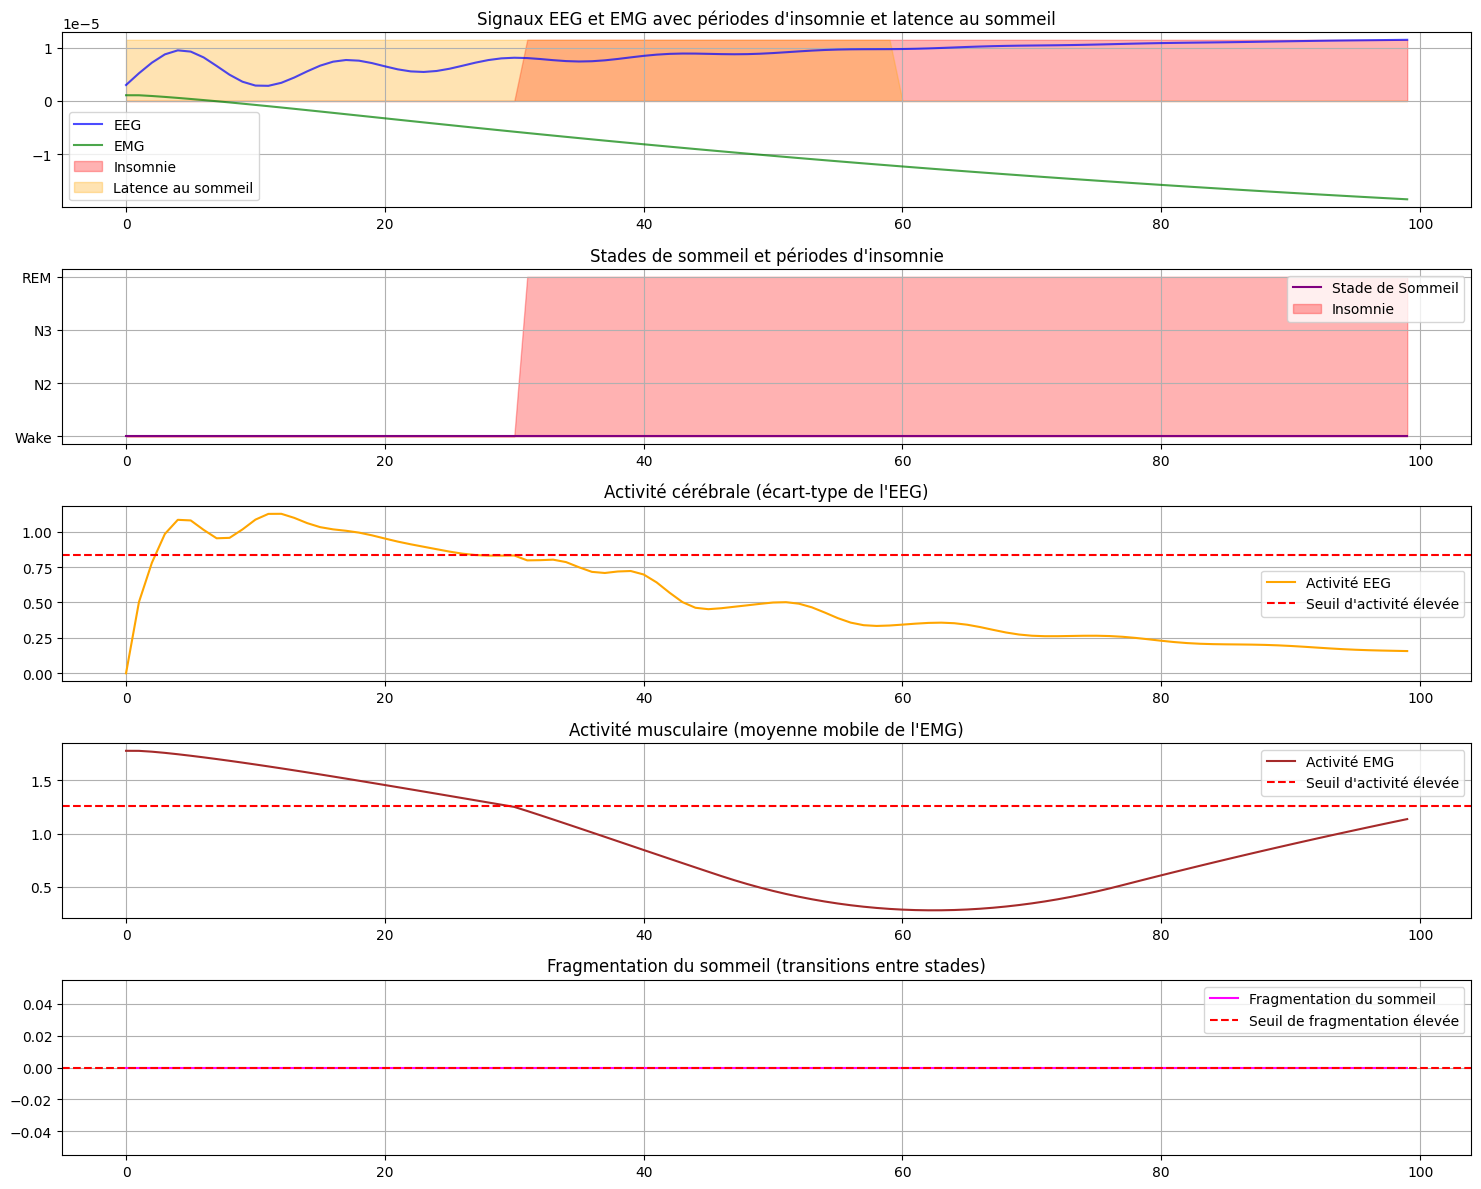


Le DataFrame avec la détection d'insomnie a été enregistré dans 'sleep_data_with_insomnia_detection.csv'


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import zscore

# Fonction pour charger les données
def load_data(file_path):
    """Charge les données de sommeil à partir d'un fichier CSV"""
    df = pd.read_csv(file_path)
    print("Colonnes disponibles:", df.columns.tolist())
    print("Premières lignes du DataFrame:")
    print(df.head())
    return df

# Fonction pour détecter l'insomnie
def detect_insomnia(df, window_size=30):
    """
    Détecte les périodes d'insomnie basées sur:
    1. Augmentation de l'activité cérébrale (EEG) pendant les périodes qui devraient être de sommeil
    2. Activité musculaire élevée (EMG) indiquant des mouvements ou de l'agitation
    3. Temps prolongé en état d'éveil (Wake) pendant la période de sommeil
    4. Transitions fréquentes entre les stades de sommeil
    """
    # Initialiser les colonnes pour la détection d'insomnie
    insomnia = np.zeros(len(df))
    sleep_latency = np.zeros(len(df))
    sleep_fragmentation = np.zeros(len(df))
    
    # Extraire les signaux
    eeg_signal = df['EEG'].values
    emg_signal = df['EMG'].values
    sleep_stages = df['Sleep_Stage_Prediction'].values
    
    # Normaliser les signaux
    eeg_z = zscore(eeg_signal)
    emg_z = zscore(emg_signal)
    
    # Calculer l'activité cérébrale (variabilité de l'EEG)
    eeg_activity = np.array([np.std(eeg_z[max(0, i-window_size):i+1]) 
                            for i in range(len(eeg_z))])
    
    # Calculer l'activité musculaire (niveau moyen d'EMG)
    emg_activity = np.array([np.mean(np.abs(emg_z[max(0, i-window_size):i+1])) 
                            for i in range(len(emg_z))])
    
    # Détecter les transitions de stade de sommeil
    stage_transitions = np.abs(np.diff(np.append(sleep_stages, sleep_stages[-1]))) > 0
    
    # Calculer la fragmentation du sommeil (fenêtre mobile de transitions)
    for i in range(len(df)):
        start_idx = max(0, i - window_size)
        sleep_fragmentation[i] = np.sum(stage_transitions[start_idx:i+1]) / (i - start_idx + 1)
    
    # Seuils pour l'identification de l'insomnie
    high_eeg_threshold = np.percentile(eeg_activity, 75)  # Activité EEG élevée
    high_emg_threshold = np.percentile(emg_activity, 70)  # Activité EMG élevée
    high_fragmentation_threshold = np.percentile(sleep_fragmentation, 80)  # Fragmentation élevée
    
    # Détection de l'insomnie
    for i in range(window_size, len(df)):
        # Vérifier l'état d'éveil (Wake)
        is_awake = sleep_stages[i] == 0
        
        # Pour les périodes qui devraient être de sommeil, détecter l'insomnie
        if is_awake:
            # Vérifier si l'éveil persiste
            wake_duration = 0
            for j in range(i, max(0, i-window_size), -1):
                if sleep_stages[j] == 0:
                    wake_duration += 1
                else:
                    break
            
            # Marquer la latence au sommeil au début de l'enregistrement
            if i < window_size * 2:
                sleep_latency[max(0, i-wake_duration):i+1] = 1
            
            # Si l'éveil est prolongé et n'est pas au début, c'est probablement de l'insomnie
            if wake_duration > window_size/3 and i > window_size * 2:
                insomnia[max(0, i-wake_duration):i+1] = 1
        
        # Détecter l'insomnie basée sur l'activité cérébrale et musculaire pendant le "sommeil"
        if not is_awake:  # Si nous sommes dans un état de sommeil (non éveil)
            high_eeg = eeg_activity[i] > high_eeg_threshold
            high_emg = emg_activity[i] > high_emg_threshold
            high_fragmentation = sleep_fragmentation[i] > high_fragmentation_threshold
            
            # Si nous avons une forte activité EEG ET EMG ou une forte fragmentation, c'est de l'insomnie
            if (high_eeg and high_emg) or high_fragmentation:
                insomnia[i] = 1
    
    return insomnia, sleep_latency, sleep_fragmentation, eeg_activity, emg_activity

# Fonction pour calculer les métriques d'insomnie
def calculate_insomnia_metrics(df, insomnia, sleep_latency, point_duration_sec=30):
    """Calcule les métriques cliniques d'insomnie"""
    total_points = len(df)
    recording_hours = (total_points * point_duration_sec) / 3600
    
    # Latence au sommeil
    sleep_latency_points = sleep_latency.sum()
    sleep_latency_minutes = (sleep_latency_points * point_duration_sec) / 60
    
    # Efficacité du sommeil
    total_sleep_time = np.sum(df['Sleep_Stage_Prediction'] != 0) * point_duration_sec / 60  # en minutes
    time_in_bed = total_points * point_duration_sec / 60  # en minutes
    sleep_efficiency = (total_sleep_time / time_in_bed) * 100 if time_in_bed > 0 else 0
    
    # Temps d'insomnie après l'endormissement (WASO - Wake After Sleep Onset)
    # Nous considérons que l'endormissement a lieu après la période initiale de latence
    sleep_onset_index = np.where(sleep_latency == 0)[0][0] if np.any(sleep_latency == 0) else 0
    waso = np.sum(df['Sleep_Stage_Prediction'].iloc[sleep_onset_index:] == 0) * point_duration_sec / 60  # en minutes
    
    # Indice d'insomnie (pourcentage de temps passé à l'état d'insomnie)
    insomnia_time_percentage = (np.sum(insomnia) / total_points) * 100
    
    # Classification de la sévérité de l'insomnie
    if sleep_efficiency >= 85 and sleep_latency_minutes <= 30 and waso <= 30:
        severity = "Normal"
    elif sleep_efficiency >= 75 and sleep_latency_minutes <= 45 and waso <= 60:
        severity = "Légère"
    elif sleep_efficiency >= 65 and sleep_latency_minutes <= 60 and waso <= 90:
        severity = "Modérée"
    else:
        severity = "Sévère"
    
    return {
        "sleep_latency_minutes": sleep_latency_minutes,
        "sleep_efficiency": sleep_efficiency,
        "waso_minutes": waso,
        "insomnia_percentage": insomnia_time_percentage,
        "severity": severity,
        "recording_hours": recording_hours
    }

# Fonction pour analyser l'insomnie par stade de sommeil
def analyze_insomnia_by_stage(df, insomnia):
    """Analyse la répartition de l'insomnie par stade de sommeil"""
    # Créer un DataFrame temporaire
    temp_df = df.copy()
    temp_df['Insomnia_Detected'] = insomnia
    
    # Calculer les statistiques par stade
    insomnia_by_stage = temp_df[temp_df['Insomnia_Detected'] == 1].groupby('Sleep_Stage_Prediction').size()
    total_by_stage = temp_df.groupby('Sleep_Stage_Prediction').size()
    percentage_by_stage = (insomnia_by_stage / total_by_stage * 100).fillna(0)
    
    stage_mapping = {0: "Wake", 1: "N2 (light sleep)", 2: "N3 (deep sleep)", 3: "REM Sleep"}
    
    results = {}
    for stage, count in insomnia_by_stage.items():
        stage_name = stage_mapping.get(stage, f"Unknown ({stage})")
        percentage = percentage_by_stage[stage] if stage in percentage_by_stage else 0
        results[stage_name] = {"count": count, "percentage": percentage}
    
    return results

# Fonction pour visualiser les résultats
def visualize_insomnia_results(df, insomnia, sleep_latency, sleep_fragmentation, eeg_activity, emg_activity):
    """Visualise les résultats de la détection d'insomnie"""
    plt.figure(figsize=(15, 12))
    
    # Plot 1: EEG et EMG avec superposition des périodes d'insomnie et de latence au sommeil
    plt.subplot(5, 1, 1)
    plt.plot(df.index, df['EEG'], label='EEG', color='blue', alpha=0.7)
    plt.plot(df.index, df['EMG'], label='EMG', color='green', alpha=0.7)
    plt.fill_between(df.index, 0, insomnia*max(df['EEG'].max(), df['EMG'].max()), 
                     color='red', alpha=0.3, label='Insomnie')
    plt.fill_between(df.index, 0, sleep_latency*max(df['EEG'].max(), df['EMG'].max()), 
                     color='orange', alpha=0.3, label='Latence au sommeil')
    plt.title('Signaux EEG et EMG avec périodes d\'insomnie et latence au sommeil')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Stades de sommeil
    plt.subplot(5, 1, 2)
    plt.plot(df.index, df['Sleep_Stage_Prediction'], label='Stade de Sommeil', color='purple')
    plt.fill_between(df.index, 0, insomnia*3, color='red', alpha=0.3, label='Insomnie')
    plt.yticks([0, 1, 2, 3], ['Wake', 'N2', 'N3', 'REM'])
    plt.title('Stades de sommeil et périodes d\'insomnie')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Activité EEG
    plt.subplot(5, 1, 3)
    plt.plot(df.index, eeg_activity, label='Activité EEG', color='orange')
    plt.axhline(y=np.percentile(eeg_activity, 75), color='r', linestyle='--', 
               label='Seuil d\'activité élevée')
    plt.title('Activité cérébrale (écart-type de l\'EEG)')
    plt.legend()
    plt.grid(True)
    
    # Plot 4: Activité EMG
    plt.subplot(5, 1, 4)
    plt.plot(df.index, emg_activity, label='Activité EMG', color='brown')
    plt.axhline(y=np.percentile(emg_activity, 70), color='r', linestyle='--', 
               label='Seuil d\'activité élevée')
    plt.title('Activité musculaire (moyenne mobile de l\'EMG)')
    plt.legend()
    plt.grid(True)
    
    # Plot 5: Fragmentation du sommeil
    plt.subplot(5, 1, 5)
    plt.plot(df.index, sleep_fragmentation, label='Fragmentation du sommeil', color='magenta')
    plt.axhline(y=np.percentile(sleep_fragmentation, 80), color='r', linestyle='--', 
               label='Seuil de fragmentation élevée')
    plt.title('Fragmentation du sommeil (transitions entre stades)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('insomnia_detection_results.png', dpi=300)
    plt.show()

# Fonction principale
def main(file_path):
    """Fonction principale pour l'analyse de l'insomnie"""
    # Charger les données
    df = load_data(file_path)
    
    # Détecter l'insomnie
    insomnia, sleep_latency, sleep_fragmentation, eeg_activity, emg_activity = detect_insomnia(df)
    
    # Ajouter les résultats au DataFrame
    df['Insomnia_Detected'] = insomnia
    df['Sleep_Latency'] = sleep_latency
    df['Sleep_Fragmentation'] = sleep_fragmentation
    df['EEG_Activity'] = eeg_activity
    df['EMG_Activity'] = emg_activity
    
    # Calculer les métriques d'insomnie
    metrics = calculate_insomnia_metrics(df, insomnia, sleep_latency)
    
    # Afficher les résultats
    print("\nRésultats de la détection d'insomnie:")
    print(f"Latence au sommeil: {metrics['sleep_latency_minutes']:.2f} minutes")
    print(f"Efficacité du sommeil: {metrics['sleep_efficiency']:.2f}%")
    print(f"Temps d'éveil après l'endormissement (WASO): {metrics['waso_minutes']:.2f} minutes")
    print(f"Pourcentage de temps avec insomnie: {metrics['insomnia_percentage']:.2f}%")
    print(f"Classification de la sévérité: {metrics['severity']}")
    
    # Analyser l'insomnie par stade de sommeil
    stage_analysis = analyze_insomnia_by_stage(df, insomnia)
    
    print("\nRépartition de l'insomnie par stade de sommeil:")
    for stage, data in stage_analysis.items():
        print(f"  {stage}: {data['count']} échantillons ({data['percentage']:.2f}% du temps dans ce stade)")
    
    # Visualiser les résultats
    visualize_insomnia_results(df, insomnia, sleep_latency, sleep_fragmentation, eeg_activity, emg_activity)
    
    # Enregistrer le DataFrame mis à jour
    df.to_csv("sleep_data_with_insomnia_detection.csv", index=False)
    print("\nLe DataFrame avec la détection d'insomnie a été enregistré dans 'sleep_data_with_insomnia_detection.csv'")

# Point d'entrée du script
if __name__ == "__main__":
    # Remplacer par votre fichier de données
    file_path = "forcast_with_sleep_stage.csv"
    main(file_path)

In [78]:
dfinsomnia=pd.read_csv("sleep_data_with_insomnia_detection.csv")
dfinsomnia

,EEG,EMG,Duration,Sleep_Stage_Prediction,Sleep_Stage_Name,Insomnia_Detected,Sleep_Latency,Sleep_Fragmentation,EEG_Activity,EMG_Activity
0,0.000003,1.068767e-06,537.839355,0,Wake,0.0,1.0,0.0,0.000000,1.777509
1,0.000005,1.064232e-06,471.476776,0,Wake,0.0,1.0,0.0,0.503085,1.777128
2,0.000007,9.260663e-07,471.476166,0,Wake,0.0,1.0,0.0,0.780396,1.769257
3,0.000009,7.565812e-07,471.476166,0,Wake,0.0,1.0,0.0,0.983075,1.758198
4,0.000009,5.688607e-07,471.476166,0,Wake,0.0,1.0,0.0,1.082961,1.745250
...,...,...,...,...,...,...,...,...,...,...
95,0.000011,-1.787759e-05,471.476166,0,Wake,1.0,0.0,0.0,0.166214,1.032428
96,0.000011,-1.801059e-05,471.476166,0,Wake,1.0,0.0,0.0,0.162993,1.058615
97,0.000011,-1.814218e-05,471.476166,0,Wake,1.0,0.0,0.0,0.160592,1.084540
98,0.000011,-1.827237e-05,471.476166,0,Wake,1.0,0.0,0.0,0.158685,1.110205
